# Kent Barter 

# Project Background

### Airbnb is a booking service for vacation rentals in which vacationers can book from an available list of user offered vacation rental services.  This platform is the most popular service of its type and is used in over 193 countries and features more than 2 million individual properties.  This open market concept has given vacationers the opportunity to evaluate many options based on the individual’s wants and needs.

### Each year Airbnb releases a series of datasets which contain information on vacation rental listings for several major cities around the world.  In this case we will be evaluating the 10 June, 2024 listing report from Toronto City.  Our goal is to determine from this data what feature of a listing best contributes to its price and if we can use these features to properly predict the price of this dataset’s contained listings.  

### In this first intersection we will be introducing the dataset.  This includes a description of its variables as well as an evaluation into the underlying structure of the data.  We have done this in three stages description, data cleaning and outlier evaluation.

### Goals:
 ### * Investigate the features responsible for listing cost.
 ### * Properly produce and evaluate a prediction model for listing cost.
 
# Acknowledgement 
### This dataset is part of Airbnb Inside, and the original source can be found [here](http://insideairbnb.com/get-the-data/). Date Compiled (10 June, 2024)

### For dataset description, We have used Glossary of Terms from [here](https://www.airdna.co/airdna-glossary-of-metric-definitions) as well as our understanding from [airbnb site](https://www.airbnb.ca/).

In [37]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import seaborn as sns
from scipy.stats import ttest_ind

from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.metrics import mutual_info_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import reciprocal
from sklearn.preprocessing import LabelEncoder
sns.set()
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel


from scipy.stats import skew
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, QuantileTransformer, Normalizer, FunctionTransformer, RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score

In [38]:
#importing Dataset
ny_listing_dataset = pd.read_csv('listings.csv.gz',
                                 parse_dates=['host_since', 'last_scraped', 'first_review', 'last_review'],
                                 low_memory = False)

# Data Description

### In this section we will be having a look at the data to get an overview of its contained features and their possible use in contributing and predicting listing cost.

In [39]:
#information about DataFrame including the index dtype and columns, non-null values and memory usage
ny_listing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21115 entries, 0 to 21114
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            21115 non-null  int64         
 1   listing_url                                   21115 non-null  object        
 2   scrape_id                                     21115 non-null  int64         
 3   last_scraped                                  21115 non-null  datetime64[ns]
 4   source                                        21115 non-null  object        
 5   name                                          21115 non-null  object        
 6   description                                   20560 non-null  object        
 7   neighborhood_overview                         11111 non-null  object        
 8   picture_url                                   21115 non-null  obje

### Data Description

 * **id** - *integer* - Airbnb's unique identifier for the listing
 * **listing_url** - *text* - Airbnb URL for that specific listing
 * **scrape_id** - *bigint* - Unique ID for each listing for scrapping
 * **last_scraped** - *date* - When the last time the listing was scrapped (YYYY-MM-DD)
 * **source** - *text* - 'city scrape' means the listing was found by searching the city and 'previous scrape' means    that listing was seen in another scrape performed in the last 65 days, and the listing was confirmed to be still available on the Airbnb site.
 * **name** - *text* - Airbnb listing Name
 * **description** - *text* - Description of the Airbnb Listing
 * **neighborhood_overview** -*text* - Neighborhood where the vacation rental property is located, where available
 * **picture_url** - *text* - Picture URL of the listing
 * **host_id** - *integer* - Airbnb's unique id for the host/user who has put the listing
 * **host_url** - *text* - URL of the listing hoster profile where renter can find about the host
 * **host_name** - *text* - Name of the Host of the listing
 * **host_since** - *date* - Time from when the user is a host on Airbnb Site (YYYY-MM-DD)
 * **host_location** - *text* - Host address
 * **host_about** - *text* - A short description about the host
 * **host_response_time** - *text* - How much time taken by the host to respond to any quires
 * **host_response_rate** - *text* - Percentage of the host response rate
 * **host_acceptance_rate** - *text* - Rate at which the host accept the request of the rent for the listing
 * **host_is_superhost** - *boolean* - Superhost is someone who goes above and beyond in their hosting duties and is a shining example of how a Host should be and a badge will be displayed in the profile of the host. *t* for true and *f* for false
 * **host_thumbnail_url** - *text* - Thumbnail URL link for host profile picture 
 * **host_picture_url** - *text* - Host Profile Picture URL
 * **host_neighbourhood** - *text* - Host's neighbouring place
 * **host_listings_count** - *integer* - How many listing the host has with Airbnb
 * **host_total_listings_count** - *integer* - Number of listing host has with Airbnb
 * **host_verifications** - ** - Methods used by host to be verified by Airbnb (e.g Email Address, Phone Number etc)
 * **host_has_profile_pic** - *boolean* - If the host a profile picture then *t* else *f*
 * **host_identity_verified** - *boolean* - If the host has verified identity then *t* else *f*
 * **neighbourhood** - *text* - General Neighbouring places of the listing
 * **neighbourhood_cleansed** - *text* - Accurate neighbouring place of the listing as per geo location
 * **neighbourhood_group_cleansed** - *text* - Accurate neighbouring group of the listing
 * **latitude** - *numeric* - Uses the World Geodetic System (WGS84) projection for latitude and longitude
 * **longitude** - *numeric* - Uses the World Geodetic System (WGS84) projection for latitude and longitude
 * **property_type** - *text* - Self selected property type described by their host
 * **room_type** - *text* - What type room will the customer get e.g. private room or entire home/apt.
 * **accommodates** - *integer* - Maximum Capacity of the listing
 * **bathrooms** - ** - empty filed
 * **bathrooms_text** - *text* - the number of bathrooms are available in the listing
 * **bedrooms** - *integer* - the number of bedrooms available in the listing
 * **beds** - *intger* - the number of beds available in the listing
 * **amenities** - *list* - what facilities the listing have
 * **price** - *currency* - the price for the listing in local currency
 * **minimum_nights** - *integer* - minimum number of night stay for the listing (calendar rules may be different)
 * **maximum_nights** - *integer* - maximum number of night stay for the listing (calendar rules may be different)
 * **minimum_minimum_nights** - *integer* - the smallest minimum_night value from the calender (looking 365 nights in the future)
 * **maximum_minimum_nights** - *integer* - the largest minimum_night value from the calender (looking 365 nights in the future)
 * **minimum_maximum_nights** - *integer* - the smallest maximum_night value from the calender (looking 365 nights in the future)
 * **maximum_maximum_nights** - *integer* - the largest maximum_night value from the calender (looking 365 nights in the future)
 * **minimum_nights_avg_ntm** - *numeric* - the average minimum_night value from the calender (looking 365 nights in the future)
 * **maximum_nights_avg_ntm** - *numeric* - the average maximum_night value from the calender (looking 365 nights in the future)
 * **calendar_updated** - ** -
 * **has_availability** - *boolaean* - if the room is available then *t* else *f*
 * **availability_30** - *integer* - avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.
 * **availability_60** - *integer* - avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.
 * **availability_90** - *integer* - avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.
 * **availability_365** - *integer* - avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.
 * **calendar_last_scraped** - *date* - The last date that our scrapers located the vacation rental listing. Each listing is scraped every three days. (YYYY-MM-DD)
 * **number_of_reviews** - *integer* - The number of reviews the listing has
 * **number_of_reviews_ltm** - *integer* - The number of reviews the listing has (in the last 12 months)
 * **number_of_reviews_l30d** - *integer* - The number of reviews the listing has (in the last 30 days)
 * **first_review** - *date* - When the listing has received its first review (YYYY-DD-MM)
 * **last_review** - *date* - When the listing has received its last review (YYYY-DD-MM)
 * **review_scores_rating** - *numeric* - What review score the property have
 * **review_scores_accuracy** - *numeric* - Average guest rating of the accuracy of the ad for the property out of 5
 * **review_scores_cleanliness** - *numeric* - Average guest rating for the cleanliness of the property out of 5
 * **review_scores_checkin** - *numeric* - Average guest rating of the ease of check-in of the property out of 5
 * **review_scores_communication** - *numeric* - Average guest rating of host communication out of 5
 * **review_scores_location** - *numeric* - Average guest rating of the location of the property out of 5
 * **review_scores_value** - *numeric* - Average guest rating of the value of the property in terms of rent out of 5
 * **license** - *text* - Licence/Permit/Registration Number
 * **instant_bookable** - *boolean* - Whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing.
 * **calculated_host_listings_count** - *integer* - The number of listings the host has in the current scrape, in the city/region geography.
 * **calculated_host_listings_count_entire_homes** - *integer* - The number of Entire home/apt listings the host has in the current scrape, in the city/region geography
 * **calculated_host_listings_count_private_rooms** - *integer* - The number of Private room listings the host has in the current scrape, in the city/region geography
 * **calculated_host_listings_count_shared_rooms** - *integer* - The number of Shared room listings the host has in the current scrape, in the city/region geography
 * **reviews_per_month** - *integer* - The average number of reviews the Property has over each month


In [40]:
# Checking the number of entries per dataset
print(f'Toronto Airbnb Listing dataset has total entry of : {len(ny_listing_dataset.id)}')

Toronto Airbnb Listing dataset has total entry of : 21115


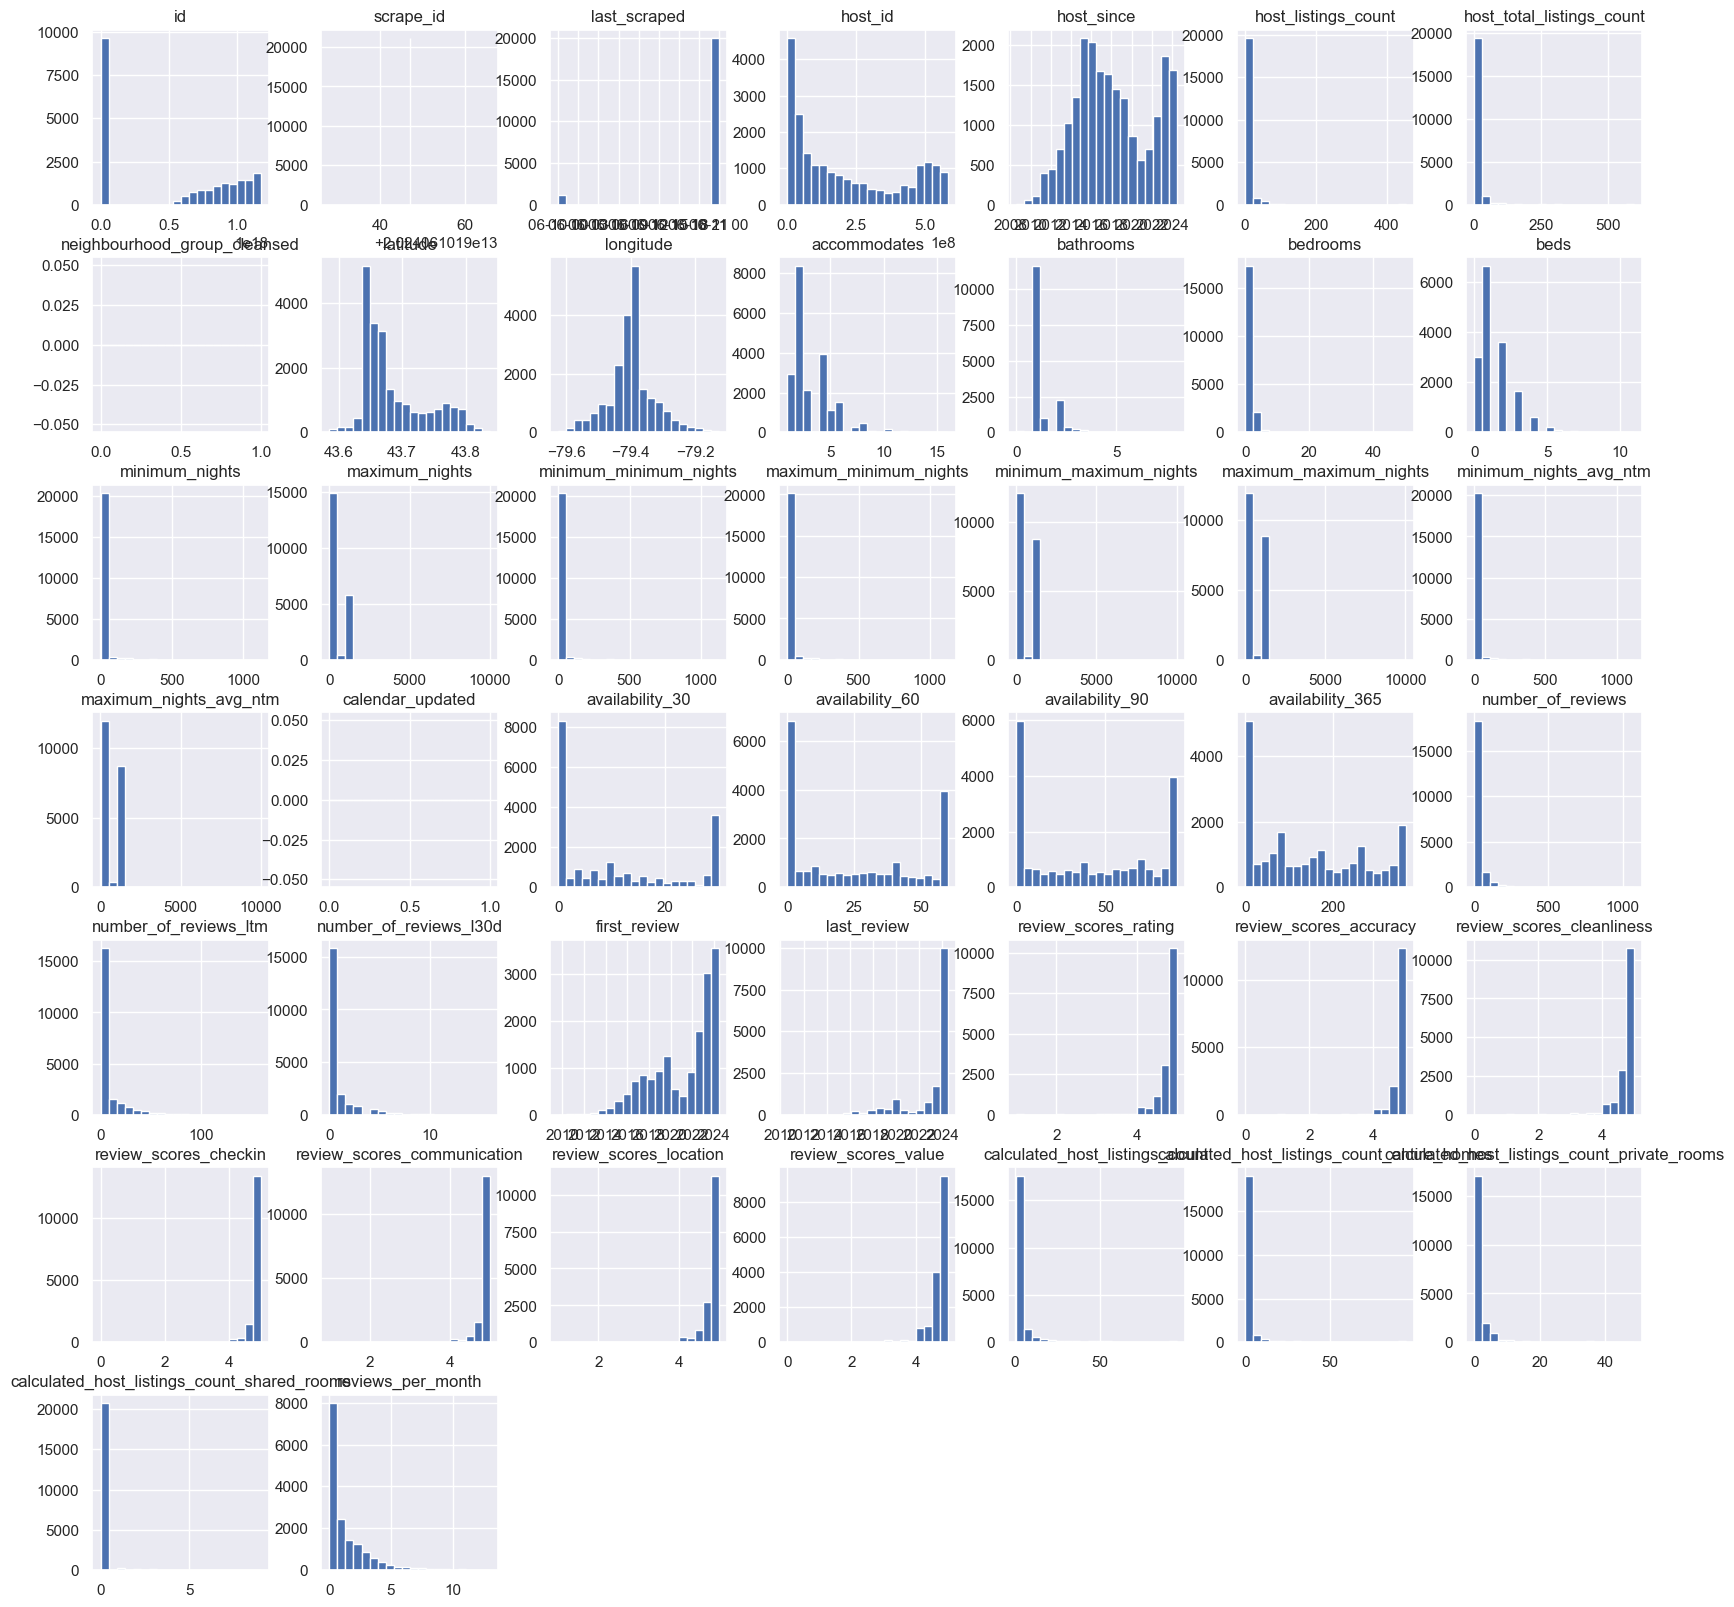

In [41]:
# Plotting the distribution of numerical and boolean categories (matplotlib)
ny_listing_dataset.hist(figsize=(20,20), bins=20);

# Data Cleaning

### As we have made an initial evaluation of which feature of the dataset will be useful for our analysis, we will remove all data which does not serve this requirement.  In addition, all data will be evaluated for its accuracy including the presence of null values which will be replaced with a grouped average for our final analysis.

### To properly represent the underlying values.  We have decided to focus on variables in several dissecting groups to give us the best opportunity to predict listing price.  These groups include host description, property description, location, availability and reviews. As this will give us the best change of determining which how the circumstances of a given listing can predict its list price and how this list price corresponds to market demand through its reviews.

# Variable Justification

## Host Description
### id, source, host_id, host_since, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_listings_count, host_total_listings_count, host_verifications, host_identity_verified, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms.

### These variables provide a description of how the host presented and responded to inquiries pertaining to a given listing and the success of the host as a user of the platform.  This pertains to how the host may have affected listing price.

## Property Description
### property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price.

### These variables provide a description of how the property was presented and represent the quality of the property as it was listed.  This pertains to how the property’s features may have affected the listing price.

## Location Description
### neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude.

### These variables provide a description of how the location affected the listing price.

## Availability
### minimum_nights, has_availability, availability_30, availability_60, availability_90, availability_365, instant_bookable.

### These variables provide a description of how the availability of the property affected the listing price.

## Reviews
### number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication,review_scores_location, review_scores_value, reviews_per_month.

### The reviews show if the market is responding well to the listing which includes the evaluation of its price.

In [42]:
# Dropping Unnecessary Columns
ny_listing_dataset = ny_listing_dataset.drop(['listing_url', 'scrape_id', 'last_scraped', 'picture_url', 'host_url',
                                             'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'neighbourhood',
                                             'bathrooms', 'minimum_minimum_nights', 'maximum_minimum_nights', 
                                             'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
                                             'maximum_nights_avg_ntm', 'calendar_updated', 'calendar_last_scraped','host_name',
                                              'host_location','host_about','name','description',
                                              'host_has_profile_pic','license','neighborhood_overview','maximum_nights'], axis=1)


In [43]:
#dropping duplicates
ny_listing_dataset.drop_duplicates()

,id,source,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,previous scrape,1565,2008-08-08,NaN,NaN,NaN,f,1.0,1.0,...,5.00,5.00,5.00,5.00,f,1,1,0,0,0.06
1,146601,city scrape,436139,2011-03-11,within a day,100%,0%,f,1.0,3.0,...,4.75,4.63,5.00,4.38,f,1,1,0,0,0.05
2,8077,previous scrape,22795,2009-06-22,NaN,NaN,NaN,f,2.0,3.0,...,4.87,4.90,4.92,4.83,f,2,1,1,0,0.94
3,179578,previous scrape,545074,2011-04-29,NaN,NaN,NaN,f,1.0,3.0,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,184784,city scrape,656777,2011-06-02,within a few hours,100%,96%,f,5.0,5.0,...,4.78,4.90,4.93,4.83,f,1,1,0,0,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21110,1175327849531843302,city scrape,20585477,2014-08-26,NaN,NaN,NaN,f,2.0,12.0,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
21111,1175343071601711310,city scrape,20585477,2014-08-26,NaN,NaN,NaN,f,2.0,12.0,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
21112,1175388787778815708,city scrape,232686000,2018-12-27,NaN,NaN,NaN,f,1.0,1.0,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
21113,1175414371124112343,city scrape,523330492,2023-07-02,within an hour,100%,100%,f,3.0,4.0,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [44]:
#Checking Null value counts column wise (around 15 percent of the dataset)
ny_listing_dataset.isnull().sum()

id                                                  0
source                                              0
host_id                                             0
host_since                                          2
host_response_time                               6072
host_response_rate                               6072
host_acceptance_rate                             5350
host_is_superhost                                 374
host_listings_count                                 2
host_total_listings_count                           2
host_verifications                                  0
host_identity_verified                              2
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    21115
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                

In [45]:
# Removing '$' from the price column and converting it to float
ny_listing_dataset['price'] = ny_listing_dataset['price'].replace('[\$,]', '', regex=True).astype(float)

In [46]:
#covert host_since, first_review, last_review to float days
today = date.today()
date_related_col = ['host_since','first_review', 'last_review']
for date_col in date_related_col:
    ny_listing_dataset[date_col] = pd.to_datetime(today) - ny_listing_dataset[date_col]

In [47]:
# removing % from host accepance & response rate and converting it to float
ny_listing_dataset['host_acceptance_rate'] = ny_listing_dataset['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)
ny_listing_dataset['host_response_rate'] = ny_listing_dataset['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)


In [48]:
#convert rates into floats
ny_listing_dataset['host_acceptance_rate'] = ny_listing_dataset['host_acceptance_rate'].apply(lambda x: round(x / 100, 2))
ny_listing_dataset['host_response_rate'] = ny_listing_dataset['host_response_rate'].apply(lambda x: round(x / 100, 2))


### Making copy of dataset as baseline for detecting and replacing outliers and null values with mechine learning algorithm , feature selection and scsling.  We will select two columns:

#### minimum_nights : to replace outliers 

#### review_score_accuracy : to replace NaN values 

In [49]:
base_dataframe = ny_listing_dataset.copy()

### From the first iteration we have seen that there are lost of rows where column value of minimum nights are above 10, which we detect as outliers as in the Iteration 1, so we will take some sample of the base dataframe to remove those outliers.

In [50]:
test_df_min_nights = ny_listing_dataset[ny_listing_dataset.minimum_nights > 10]
test_df_min_nights = test_df_min_nights.sample(n=2000)
test_df_min_nights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10717 to 2075
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   id                                            2000 non-null   int64          
 1   source                                        2000 non-null   object         
 2   host_id                                       2000 non-null   int64          
 3   host_since                                    2000 non-null   timedelta64[ns]
 4   host_response_time                            1237 non-null   object         
 5   host_response_rate                            1237 non-null   float64        
 6   host_acceptance_rate                          1320 non-null   float64        
 7   host_is_superhost                             1969 non-null   object         
 8   host_listings_count                           2000 non

In [51]:
test_df_review_score_accuracy = base_dataframe[base_dataframe['review_scores_accuracy'].isna()].sample(2000)
test_df_review_score_accuracy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1475 to 6309
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   id                                            2000 non-null   int64          
 1   source                                        2000 non-null   object         
 2   host_id                                       2000 non-null   int64          
 3   host_since                                    2000 non-null   timedelta64[ns]
 4   host_response_time                            1153 non-null   object         
 5   host_response_rate                            1153 non-null   float64        
 6   host_acceptance_rate                          1147 non-null   float64        
 7   host_is_superhost                             1970 non-null   object         
 8   host_listings_count                           2000 non-

### Data Cleaning continued on the original dataset; this will be used as a traditional comparison point.  We will first fill cell with missing values before assessing the state of outliers one feature at a time with its own individual centrality measurement.

### For most of these values we can assume that the missing value represent the minimum participating amount while for other a best assumption might be its centrality measure in this case mean. 

### An example of this can be a missing number of rooms where we can assume the minimum participating values as the number of rooms is a significant marketing feature. This serves as a method of allowing the entry to participate without adjusting the overall mean.

In [52]:
#Fill NaN cells with O for numeric & timedata columns
ny_listing_dataset.update(ny_listing_dataset.select_dtypes('timedelta64[ns]').fillna(pd.Timedelta(seconds=0)))
ny_listing_dataset.update(ny_listing_dataset.select_dtypes(include=[int, np.float32, np.float64]).fillna(0))

In [53]:
#updating host_response_time with Not Mentioned where is NaN
ny_listing_dataset['host_response_time'] = ny_listing_dataset['host_response_time'].fillna('Not Mentioned')

In [54]:
#checking where host_identity_verified column has empty value
ny_listing_dataset[ny_listing_dataset.host_identity_verified.isna()]
#filling the null values of host_identity_verified column with 'unconfirmed'
ny_listing_dataset['host_identity_verified'] = ny_listing_dataset['host_identity_verified'].fillna('unconfirmed')

In [55]:
# checking where host_is_superhost column has empty value
ny_listing_dataset[ny_listing_dataset.host_is_superhost.isna()]
#filling the null values of host_is_superhost column with 'unconfirmed'
ny_listing_dataset['host_is_superhost'] = ny_listing_dataset['host_is_superhost'].fillna('unconfirmed')

In [56]:
#room type with most common bedrooms count
ny_listing_dataset.groupby(['room_type'])['bedrooms'].agg(pd.Series.mode)

room_type
Entire home/apt    1.0
Private room       1.0
Shared room        1.0
Name: bedrooms, dtype: float64

### As we can see all room type has most common data 1 bed for each group, so we will fill NaN with 1.

In [57]:
#assigning 1 to the missing beds rows
ny_listing_dataset['beds'] = ny_listing_dataset['beds'].fillna(1)

In [58]:
#room type with most common bathroom text
ny_listing_dataset.groupby(['room_type'])['bathrooms_text'].agg(pd.Series.mode)

room_type
Entire home/apt           1 bath
Private room       1 shared bath
Shared room        1 shared bath
Name: bathrooms_text, dtype: object

### From the above we can see most common bathroom type for each room type, so we will fill NaN bathroom according to the room type.  We will use this mean to fill in for missing values to keep the relative avlue of the listing according to its features.

In [59]:
#Assigning most common bathroom_text with room type most common value
ny_listing_dataset['bathrooms_text'] = np.where((ny_listing_dataset['room_type'] == 'Entire home/apt') & ny_listing_dataset['bathrooms_text'].isna(), '1 bath', ny_listing_dataset['bathrooms_text'])
ny_listing_dataset['bathrooms_text'] = np.where((ny_listing_dataset['room_type'] == 'Hotel room') & ny_listing_dataset['bathrooms_text'].isna(), '1 private bath', ny_listing_dataset['bathrooms_text'])
ny_listing_dataset['bathrooms_text'] = np.where((ny_listing_dataset['room_type'] == 'Private room') & ny_listing_dataset['bathrooms_text'].isna(), '1 shared bath', ny_listing_dataset['bathrooms_text'])
ny_listing_dataset['bathrooms_text'] = np.where((ny_listing_dataset['room_type'] == 'Shared room') & ny_listing_dataset['bathrooms_text'].isna(), '1 shared bath', ny_listing_dataset['bathrooms_text'])

In [60]:
#Checking null value count column wise
ny_listing_dataset.isnull().sum()

id                                                 0
source                                             0
host_id                                            0
host_since                                         0
host_response_time                                 0
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_identity_verified                             0
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                  

# Assessing Outliers

### In this section we will be evluating for outliers and persorming data science procedures to reduce thier impact on the dataset.  In order to do this we will be performing some introductory plots to be able to closly monotor the state of the data and the range of its varibles.

## Removing Outliers from Minimum Night Stay

### For outlier detection we use **Interquartile Range Method**

In [61]:
#checking min and max value from minimum nights
ny_listing_dataset['minimum_nights'].min(), ny_listing_dataset['minimum_nights'].max()

(1, 1125)

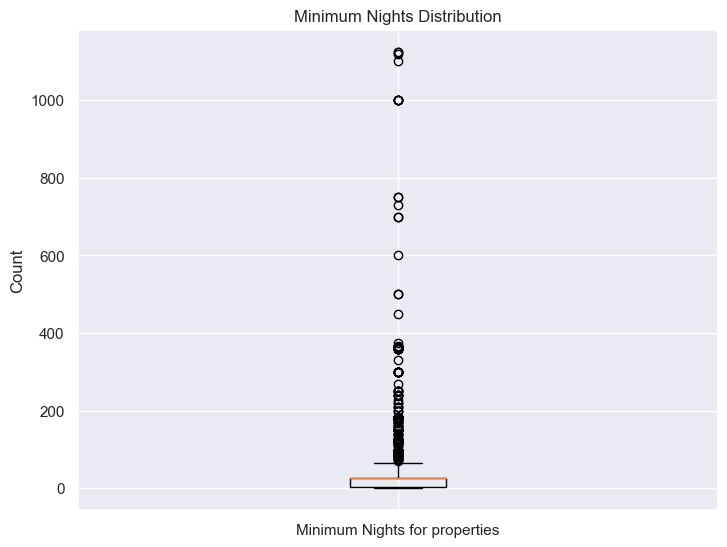

In [62]:
#taking minimum nights to a list
min_nights = ny_listing_dataset['minimum_nights'].to_list()
#figure plotting
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
label = ['Minimum Nights for properties']
bp = ax.boxplot(min_nights, labels = label)
ax.set_ylabel('Count')
ax.set_title('Minimum Nights Distribution')
plt.show()

In [63]:
#describe the minimum nights column
ny_listing_dataset.minimum_nights.describe()

count    21115.000000
mean        24.810230
std         38.906561
min          1.000000
25%          3.000000
50%         28.000000
75%         28.000000
max       1125.000000
Name: minimum_nights, dtype: float64

In [64]:
#Interquartile Range Method
q3 = np.percentile(ny_listing_dataset['minimum_nights'], 75)
q1 = np.percentile(ny_listing_dataset['minimum_nights'], 25)
iqr = q3 - q1
outlier = q3 + (1.5 * iqr)


#Clean data
cond_1, cond_2 = ny_listing_dataset.minimum_nights > 0, ny_listing_dataset.minimum_nights < outlier
ny_listing_dataset = ny_listing_dataset[cond_1 & cond_2]

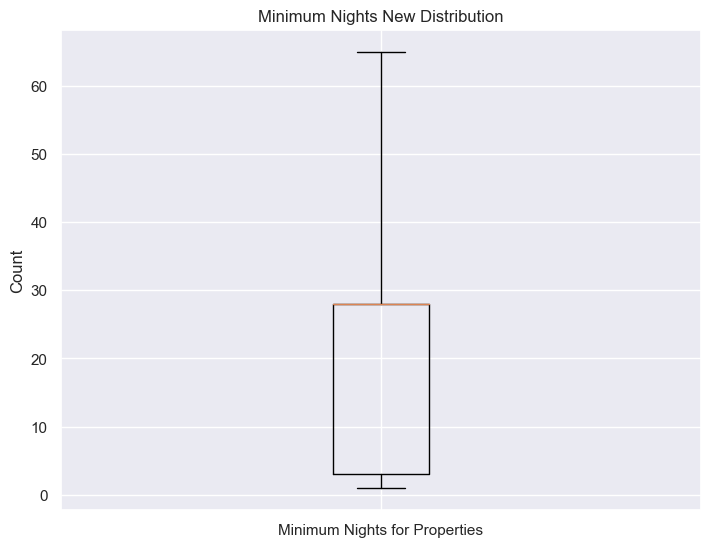

In [65]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

label = ['Minimum Nights for Properties']
bp = ax.boxplot(ny_listing_dataset.minimum_nights, labels = label)
ax.set_ylabel('Count')
ax.set_title('Minimum Nights New Distribution')
plt.show()

In [66]:
ny_listing_dataset.minimum_nights.describe()

count    20469.000000
mean        20.031804
std         12.909844
min          1.000000
25%          3.000000
50%         28.000000
75%         28.000000
max         65.000000
Name: minimum_nights, dtype: float64

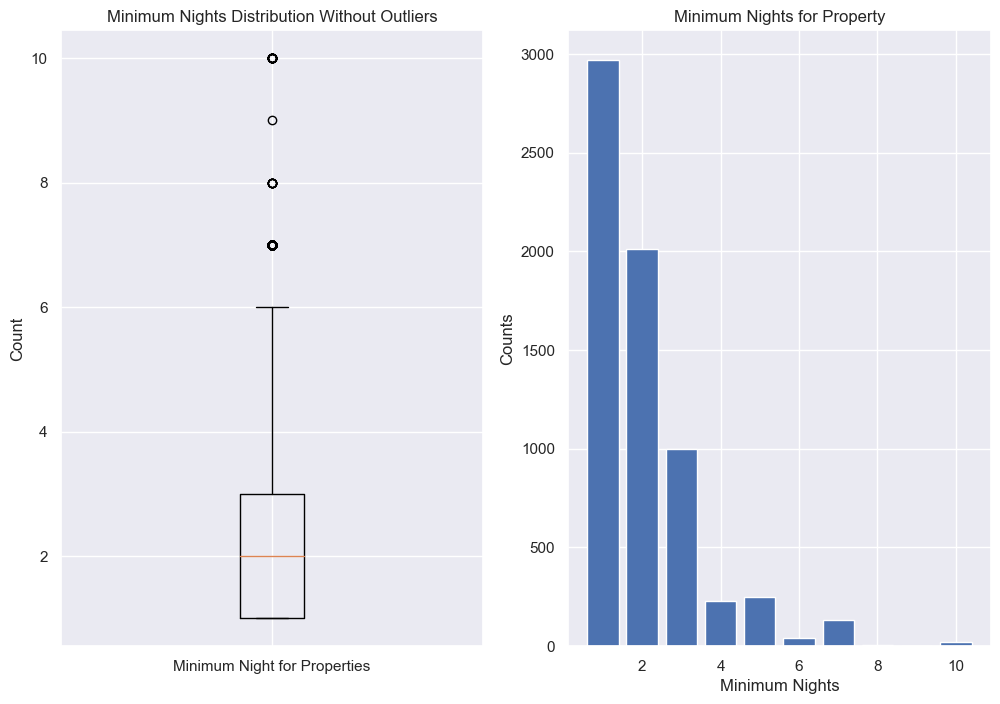

In [67]:
# Removing Outliers
ny_listing_dataset = ny_listing_dataset[ny_listing_dataset.minimum_nights <= 10]
ny_listing_dataset.minimum_nights = list(map(int, ny_listing_dataset.minimum_nights))

fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs=axs.flatten() 

box_val = [ny_listing_dataset.minimum_nights]
label = ['Minimum Night for Properties']
axs[0].boxplot(box_val, labels = label)
axs[0].set_ylabel('Count')
axs[0].set_title('Minimum Nights Distribution Without Outliers')

counts = ny_listing_dataset['minimum_nights'].value_counts()
axs[1].bar(counts.index, counts.values)
axs[1].set_xlabel('Minimum Nights')
axs[1].set_ylabel('Counts')
axs[1].set_title('Minimum Nights for Property')

plt.show()

**At first, Our minimum nights were (1 - minimum value, 1250 - max value). We can tell that, 1250 is definately is an outlier as well as anyvalue more than 10 can be considered as outlired as most of the values were in this range.**

### Room Type

In [68]:
# room type counts
ny_listing_dataset['room_type'].value_counts()

Entire home/apt    4218
Private room       2413
Shared room          28
Name: room_type, dtype: int64

**We can see that, in our dataset, most common room type is Entire home/apt, after that Private room, then Shared room and after that hotel room. From here we can see the available options for selecting room while choosing airbnb in Toronto.**

ValueError: 'explode' must be of length 'x'

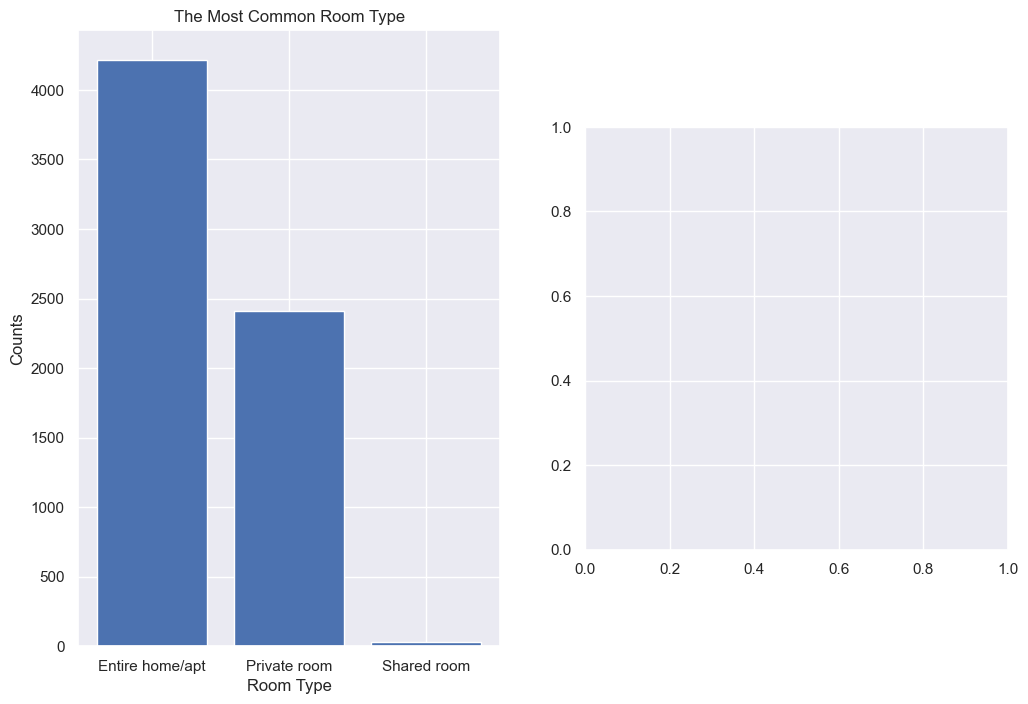

In [69]:
counts = ny_listing_dataset['room_type'].value_counts()
df_room_type = pd.DataFrame(counts)
df_room_type.rename(columns={'room_type': 'counts'}, inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs=axs.flatten() 

axs[0].bar(df_room_type.index, df_room_type.counts)
axs[0].set_xlabel('Room Type')
axs[0].set_ylabel('Counts') 
axs[0].set_title('The Most Common Room Type')

labels = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel Room']
sizes = df_room_type['counts'].tolist()
color = ['cyan', 'limegreen', 'royalblue', 'violet']
axs[1].pie(sizes,
          explode = (0, 0, 0, 0.2),
          startangle =90,
          colors = color,
          autopct = '%1.1f%%',
          pctdistance=1.3
          )
axs[1].axis('equal')
axs[1].set_title('Composition of Room Types ')
axs[1].legend(labels, bbox_to_anchor=(0.85, 1))

plt.show()

### From the Graph, we can see that, only 0.5% rooms from the listing are Hotel room, 1.4% are Shared room. We can say that these are the least picked room in NY, while Entire Home/Apt is the most listed properties with 57.1% and Private rooms are second with 41%.

#### Neighbour Group

In [70]:
#creating a new dataframe with neighbourhood with respect to room tyep
room_type_with_neighbour_group = ny_listing_dataset.filter(['neighbourhood_group_cleansed','room_type'], axis=1)

#generating pivot table with the newly created pivot table
pivot_table = room_type_with_neighbour_group.pivot_table(index = 'room_type',
                                                        columns = 'neighbourhood_group_cleansed',
                                                        values = 'neighbourhood_group_cleansed',
                                                        aggfunc='size',
                                                        fill_value=0 #for filling nan values in pivot
                                                        )
pivot_table


neighbourhood_group_cleansed,0.0
room_type,
Entire home/apt,4218
Private room,2413
Shared room,28


### From the table, we can see the availability of each room type in 5 Neighbour groop for Toronto. As usual here we are also seeing the same pattern for the roomtype like before.

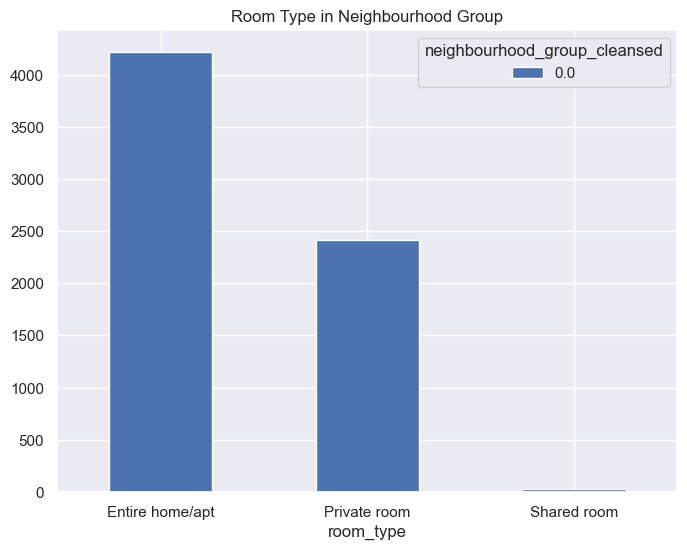

In [71]:
#Plotting the pivot tabel in the bar chart for visualization
pivot_table.plot(kind= 'bar',
                 figsize = (8,6),
                 title = 'Room Type in Neighbourhood Group',
                 rot=0)
plt.show()

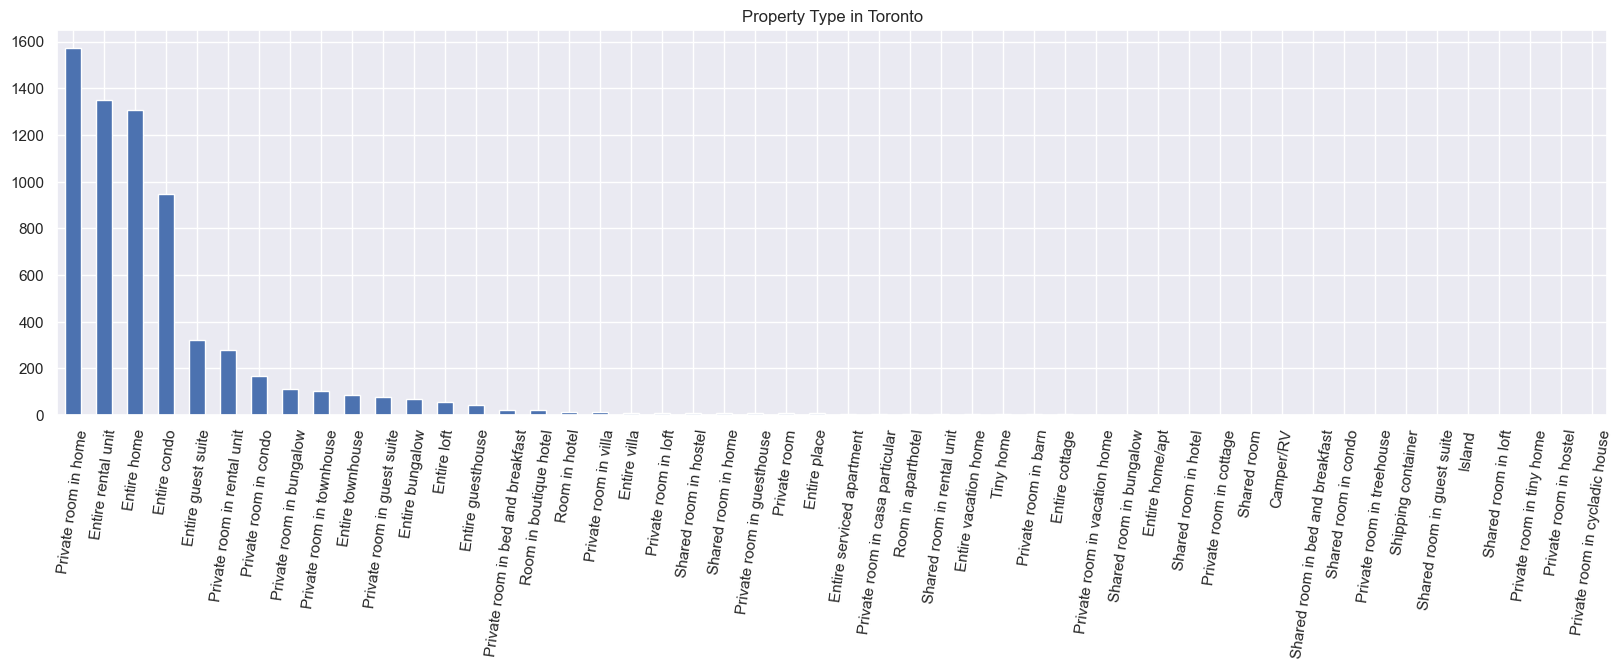

In [72]:
# Property type mentioned in NY Airbnb Dataset visualization
plt.figure(figsize=(20,5))
ny_listing_dataset['property_type'].value_counts().plot(kind='bar')
plt.title('Property Type in Toronto')
plt.xticks(rotation=82)
plt.show()

### We can see the all the available property type listed in Toronto Airbnb sites, here also enter rental unit and private rooms are listed as most property type

In [73]:
#checking how many types of property listed in the dataset
print(f'Toronto Airbnb Dataset has total {len(ny_listing_dataset.property_type.unique())} types of property')

Toronto Airbnb Dataset has total 50 types of property


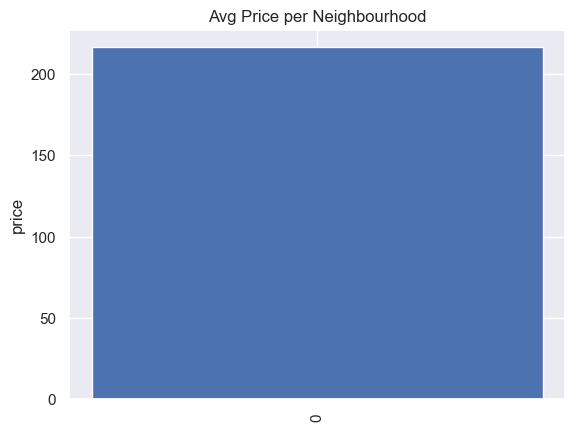

In [74]:
# Average Price per Neighbourhood Group
price_temp=ny_listing_dataset['price'].groupby(ny_listing_dataset['neighbourhood_group_cleansed']).mean().sort_values(ascending=True)
neighbourhoods = price_temp.index
avg_price = price_temp.values

#plotting the avg price per neighbourhood 
price_plot = plt.bar(neighbourhoods, avg_price) 
plt.ylabel('price')
plt.title('Avg Price per Neighbourhood')
plt.xticks(range(len(neighbourhoods)),rotation='vertical')
plt.show()

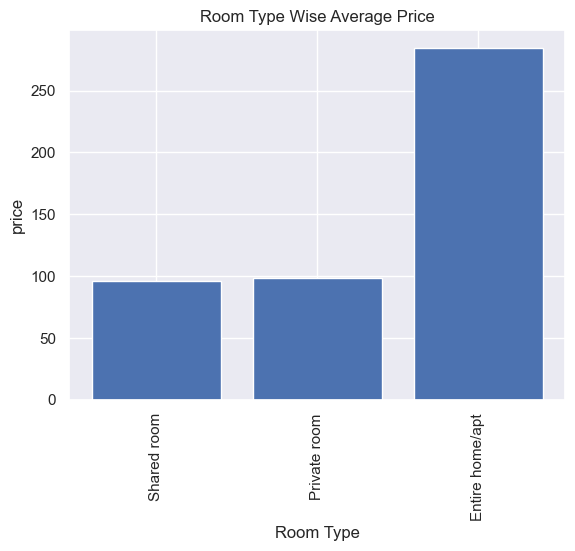

In [75]:
#Avg price per room type
price_room_wise = ny_listing_dataset['price'].groupby(ny_listing_dataset['room_type']).mean().sort_values(ascending=True)
roomtype = price_room_wise.index
avg_price_roomwise = price_room_wise.values

rwp_plot = plt.bar(roomtype, avg_price_roomwise)
plt.ylabel('price')
plt.xlabel('Room Type')
plt.title('Room Type Wise Average Price')
plt.xticks(range(len(roomtype)), rotation='vertical')
plt.show()


In [76]:
agg_dic = {'price': ['mean', 'std', 'median']}
ny_listing_dataset.groupby('room_type').agg(agg_dic)

price                   
                       mean         std median
room_type                                     
Entire home/apt  284.561404  281.701821  243.5
Private room      98.454621   71.296540   85.0
Shared room       95.821429   78.576244   70.5

### From the table, we can see the median value for Private room & Shared room is less than 90 USD where Entire home/apt can be rented at median value of 200 USD and hote rooms at an astoning 307 USD.

In [77]:
ny_listing_dataset.groupby('neighbourhood_group_cleansed').agg(agg_dic)

price                   
                                    mean         std median
neighbourhood_group_cleansed                               
0.0                           216.328878  245.305145  175.0

### From the table we can see that, Medain price for renting an airbnb in NY is cheapest at Bronx with 96 USD where Manhattan is the highest with 214 USD.

# Conclusions (Iteration 1)

### In this evaluation we have given an overview of the datasets containing features and their possible use in contributing and predicting listing cost.  In the data cleaning portion of this project, we have interacted with the data in several ways to ensure that the remaining information is as unchanged as possible from its accurate and completer form.  To accomplish this, we have performed the following procedures.

##### * Removed excess information and converted several columns to the correct data type which includes the price, host_since, first_review, last_review, host acceptance, response rate.

##### *  Cells which did not contain a value which were originally marked NaN were replaced with zero to denote a missing measurement.

##### *  The data columns were then evaluated for outliers and assessed as to their contribution to the dataset, if present these outliers were removed by quantile functions.

### After these steps were completed, introductory graphs were compelled to show the underlying structure of the data.  In this case our evaluation mainly considered the neighbourhood_group and room_type variables to reflect how the largest inner sets of the data present themselves.


# Iteration 2

## Background Story


### Airbnb has been changing hospitality and tourism around the world and as the rise of internet platforms, mobile phones and changing technology has revolutionized this trend on a large scale. As per New York Times, Airbnb has been among the biggest player in the short term rental market and due to its rapid growth led to turn residential neighbourhood into tourist zones.

### Currently Airbnb offers price prediction in two ways
1. Price Tips

2. Smart Pricing


## Aim of the project

### The main of the project is to predict the price of Toronto Airbnb price. Also find the attributes which has significant impact on pricing. Also use different ML models and finds which one is best.


## Problem Statement

### Even though Airbnb suggest price for properties for hosts, still it's a daunting task for host to set the right price for their property(ies) considering the amount of competions in the market. Airbnb losses 45% of revenue due to inappropriate pricing of the listing.

### Encoding Features

In [78]:
#converting  boolean values to 0 and 1
boolean_columns = ['host_is_superhost','host_identity_verified','has_availability','instant_bookable']

for boolean_col in boolean_columns:
    ny_listing_dataset[boolean_col].replace({'t|T': 1, 'f|F': 0}, regex=True, inplace=True)

ny_listing_dataset[boolean_columns].head()

,host_is_superhost,host_identity_verified,has_availability,instant_bookable
19,1,1,1.0,0
28,0,1,1.0,0
40,0,1,1.0,0
50,1,1,1.0,0
51,0,1,1.0,0


In [79]:
#host verifications
ny_listing_dataset.host_verifications.replace(r'[\[\]\"\'\.]', '', regex=True, inplace=True)
ny_listing_dataset.host_verifications.str.lower()

19       email, phone
28       email, phone
40       email, phone
50       email, phone
51       email, phone
             ...     
21107    email, phone
21109    email, phone
21112    email, phone
21113    email, phone
21114           phone
Name: host_verifications, Length: 6659, dtype: object

In [80]:
host_verifications = ny_listing_dataset.host_verifications.str.split(',', expand=True)

# For each col, extract the unique amenities
host_verifications_uniques = []
for col in host_verifications.columns:
    host_verifications_uniques += list(host_verifications[col].unique())


for i in range(len(host_verifications_uniques)):
    if host_verifications_uniques[i] == '':
        host_verifications_uniques[i] = 'not_verified'
    elif host_verifications_uniques[i] == 'None':
        host_verifications_uniques[i] = 'not_verified'   

print(host_verifications_uniques)

#removing duplicates from list
host_verifications_uniques = [*set(host_verifications_uniques)]
host_verifications_uniques

#removing None from list
res = []
for val in host_verifications_uniques:
    if val != None :
        res.append(val)

print(res)

#removing white spaces from the list
rs = [i.strip() for i in res]
rs = [*set(rs)]
print(rs)

['email', 'phone', 'not_verified', ' phone', None, ' work_email', None, ' work_email']
['not_verified', ' phone', 'email', ' work_email', 'phone']
['phone', 'not_verified', 'work_email', 'email']


In [81]:
#Removing Brackets and Special Characters from ammenities column
ny_listing_dataset.amenities.replace(r'[\[\]\"\'\.]', '', regex=True, inplace=True)
ny_listing_dataset.amenities.replace(to_replace=r"\\u", value=" ", regex=True, inplace=True)
ny_listing_dataset.amenities.replace(to_replace=r"\\", value=" ", regex=True, inplace=True)
ny_listing_dataset.amenities.str.lower()

ny_listing_dataset['amenities_count'] = ny_listing_dataset['amenities'].str.split(',').str.len()
ny_listing_dataset[['amenities','amenities_count']].head()

,amenities,amenities_count
19,"Shared backyard 2013 Fully fenced, Stove, Din...",60
28,"Portable fans, Luggage dropoff allowed, Stove,...",63
40,"Portable fans, Luggage dropoff allowed, Dining...",68
50,"Luggage dropoff allowed, Dining table, BBQ gri...",53
51,"Luggage dropoff allowed, Dining table, Private...",75


In [82]:
ny_listing_dataset.property_type.unique()

array(['Entire home', 'Entire townhouse', 'Entire condo',
       'Private room in home', 'Entire loft', 'Entire rental unit',
       'Private room in condo', 'Entire guest suite',
       'Private room in guest suite', 'Private room in townhouse',
       'Private room in cottage', 'Entire place',
       'Private room in rental unit', 'Private room',
       'Private room in loft', 'Shared room in loft', 'Entire bungalow',
       'Entire guesthouse', 'Private room in bungalow',
       'Private room in barn', 'Tiny home', 'Shared room in hostel',
       'Private room in hostel', 'Shared room in condo',
       'Entire serviced apartment', 'Private room in guesthouse',
       'Private room in villa', 'Entire villa',
       'Private room in tiny home', 'Room in boutique hotel',
       'Entire cottage', 'Island', 'Private room in bed and breakfast',
       'Shared room in bungalow', 'Private room in casa particular',
       'Entire vacation home', 'Private room in vacation home',
       'Room 

In [83]:
#replacing categories of houses/hotels/apartments
ny_listing_dataset = ny_listing_dataset.replace({
                            'Private room in rental unit' : 'private_room',
                            'Entire rental unit' : 'house',
                            'Entire townhouse' : 'house',
                            'Room in boutique hotel' : 'hotel',
                            'Private room in bed and breakfast' : 'private_room', 
                            'Private room in townhouse' : 'private_room',
                            'Private room in home' : 'private_room', 
                            'Private room in condo' : 'private_room',
                            'Private room in loft' : 'private_room', 
                            'Entire guesthouse' : 'house', 
                            'Entire guest suite' : 'house',
                            'Entire loft' : 'house', 
                            'Private room in guest suite' : 'private_room',
                            'Entire serviced apartment' : 'apartment', 
                            'Entire condo' : 'house', 
                            'Entire home' : 'house',
                            'Shared room in loft' : 'shared_room', 
                            'Shared room in rental unit' : 'shared_room',
                            'Private room in houseboat' :  'private_room', 
                            'Shared room in home' : 'shared_room', 
                            'Private room' : 'private_room',
                            'Entire place' : 'house', 
                            'Private room in guesthouse' : 'private_room', 
                            'Boat' : 'other',
                            'Room in aparthotel' : 'apartment', 
                            'Room in serviced apartment' : 'apartment',
                            'Private room in religious building' : 'private_room', 
                            'Entire cottage' : 'house',
                            'Private room in serviced apartment' : 'private_room', 
                            'Cave' : 'other', 
                            'Tiny home' : 'house',
                            'Entire bungalow' : 'house', 
                            'Shared room in condo' : 'shared_room', 
                            'Floor' : 'private_room',
                            'Private room in hostel' : 'private_room', 
                            'Private room in casa particular' : 'private_room',
                            'Room in hotel' : 'hotel', 
                            'Shared room in townhouse' : 'shared_room',
                            'Private room in bungalow' : 'private_room', 
                            'Houseboat' : 'other', 
                            'Private room in resort' : 'private_room',
                            'Entire villa' : 'house', 
                            'Shared room in guest suite' : 'shared_room',
                            'Private room in villa' : 'private_room', 
                            'Shared room in floor' : 'shared_room',
                            'Private room in floor' : 'private_room', 
                            'Entire bed and breakfast' : 'house',
                            'Entire home/apt' : 'house', 
                            'Private room in tent' : 'private_room',
                            'Private room in in-law' : 'private_room', 
                            'Shared room in hostel' : 'shared_room',
                            'Room in resort' : 'private_room', 
                            'Shared room in guesthouse' : 'shared_room',
                            'Shared room in bed and breakfast' : 'shared_room', 
                            'Private room in farm stay' : 'private_room',
                            'Private room in dorm' : 'private_room', 
                            'Room in bed and breakfast' : 'private_room',
                            'Private room in tiny home' : 'private_room', 
                            'Shared room in serviced apartment' : 'shared_room',
                            'Shared room in bungalow' : 'shared_room', 
                            'Private room in earthen home' : 'private_room',
                            'Private room in barn' : 'private_room', 
                            'Private room in cottage' : 'private_room', 
                            'Lighthouse' : 'house',
                            'Private room in train' : 'private_room', 
                            'Barn' : 'house', 
                            'Private room in lighthouse' : 'private_room',
                            'Casa particular' : 'house', 
                            'Camper/RV' : 'other', 
                            'Private room in camper/rv' : 'private_room',
                            'Private room in vacation home' : 'private_room', 
                            'Castle' : 'other', 
                            'Tent' : 'other', 
                            'Tower' : 'other',
                            'Entire vacation home' : 'house', 
                            'Shared room in vacation home' : 'shared_room',
                            'Private room in minsu' : 'private_room', 
                            'Shared room' : 'shared_room',
                            'Shared room in casa particular' : 'shared_room'  
                        })

In [84]:
ny_listing_dataset.property_type.unique()

array(['house', 'private_room', 'shared_room', 'apartment', 'hotel',
       'Island', 'Shipping container', 'Private room in treehouse',
       'Shared room in hotel', 'other', 'Private room in cycladic house'],
      dtype=object)

In [85]:
ny_listing_dataset.room_type.unique()

array(['house', 'private_room', 'shared_room'], dtype=object)

In [86]:
ny_listing_dataset = ny_listing_dataset.replace({
    'Hotel room' : 'hotel_room'
})

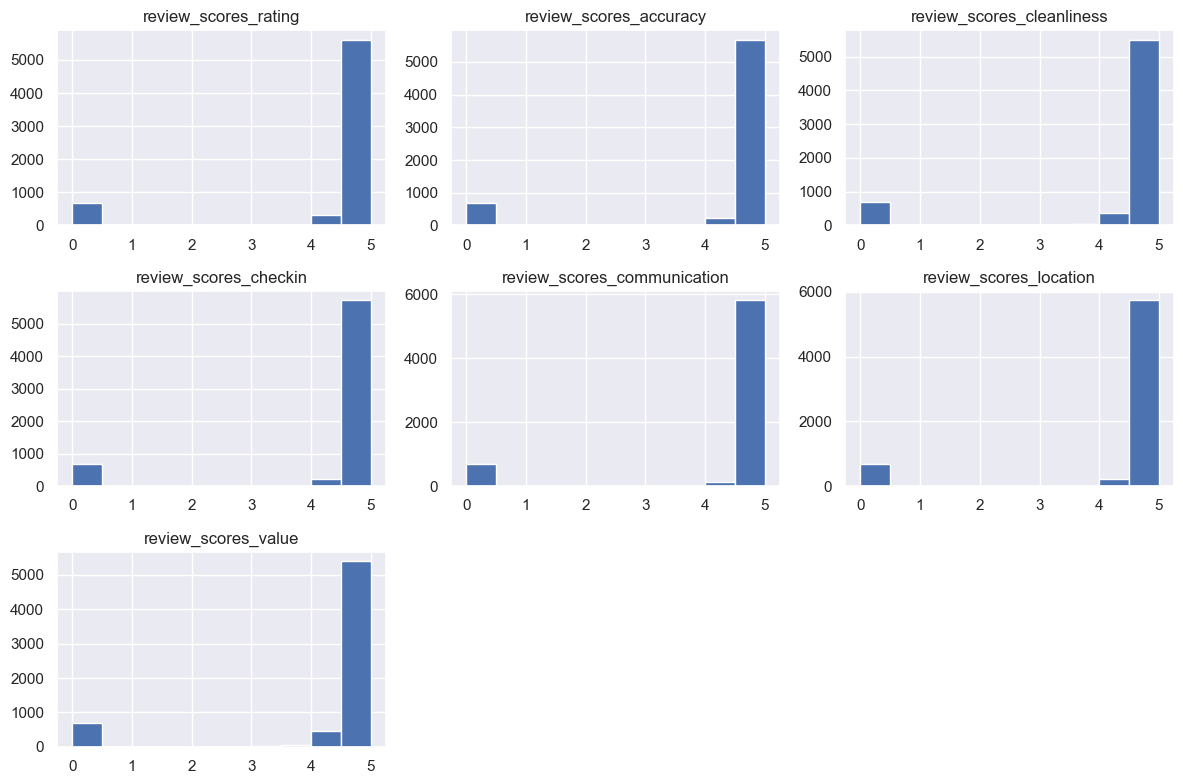

In [87]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(ny_listing_dataset.columns[ny_listing_dataset.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    ny_listing_dataset[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [88]:
#Plots a simple bar chart of the counts of true and false categories in the column specified,
#next to a bar chart of the median price for each category.
#A t-test P-value is calculated.
#A figure size can optionally be specified.

def pricewise_boolean_value_plot(df, col, figsize=(8,3)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    
    df.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    plt.show()
    
    cat0 = df.loc[df[col] == 0.0].price
    cat1 = df.loc[df[col] == 1.0].price
    tstatistic, pvalue = ttest_ind(cat0, cat1)
    
    cat0_median =(df.loc[df[col] == 0.0].price.median())
    cat1_median = (df.loc[df[col] == 1.0].price.median())
    cat0_count =(df.loc[df[col] == 0.0].price.count())
    cat1_count =(df.loc[df[col] == 1.0].price.count())
    print("")
    print('P-value is %6.2e' % pvalue)
    print("There are " + str(cat0_count) + " without " + str(col) + ", with a median price of " + str(cat0_median))
    print("There are " + str(cat1_count) + " with "  + str(col) + ", with a median price of " + str(cat1_median))

    # Bonferroni correction
    if pvalue < (0.05/106):
        print("Effect is significant!")
    
    df.groupby(col).price
    return pvalue

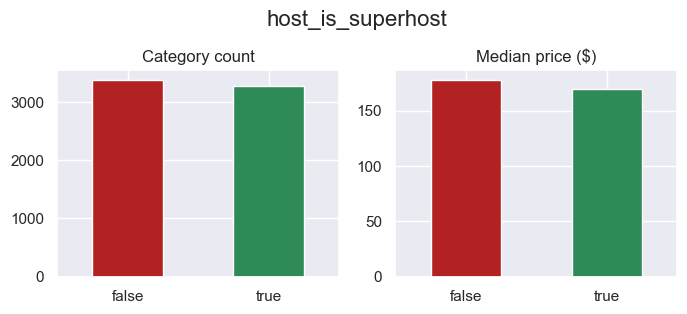


P-value is 8.85e-01
There are 3380 without host_is_superhost, with a median price of 178.0
There are 3279 with host_is_superhost, with a median price of 170.0
0    0.507584
1    0.492416
Name: host_is_superhost, dtype: float64


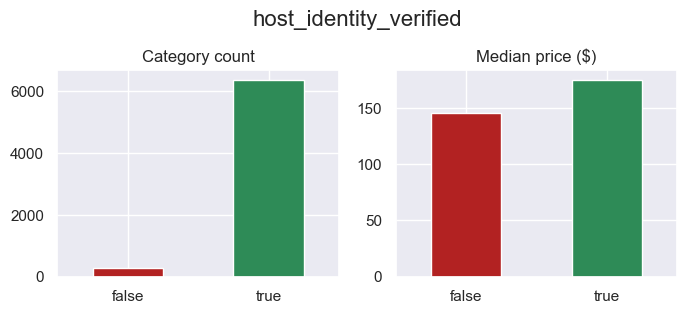


P-value is 1.06e-01
There are 297 without host_identity_verified, with a median price of 145.0
There are 6362 with host_identity_verified, with a median price of 175.0
1    0.955399
0    0.044601
Name: host_identity_verified, dtype: float64


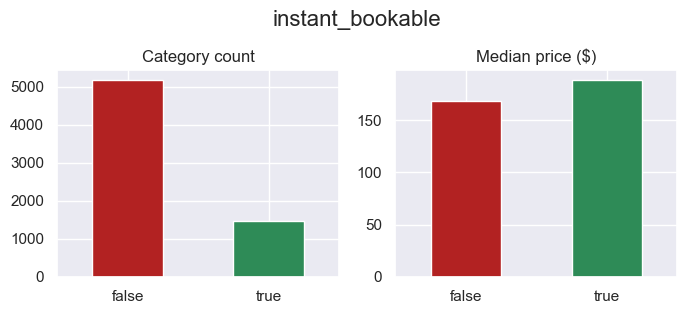


P-value is 3.78e-01
There are 5181 without instant_bookable, with a median price of 168.0
There are 1478 with instant_bookable, with a median price of 188.5
0    0.778045
1    0.221955
Name: instant_bookable, dtype: float64


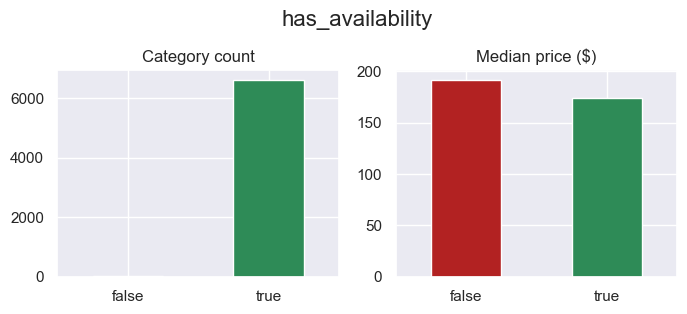


P-value is 7.57e-01
There are 13 without has_availability, with a median price of 192.0
There are 6611 with has_availability, with a median price of 174.0
1.0    0.998037
0.0    0.001963
Name: has_availability, dtype: float64


In [89]:
superhost = pricewise_boolean_value_plot(ny_listing_dataset, 'host_is_superhost')
print(ny_listing_dataset.host_is_superhost.value_counts(normalize=True))

host_identity_verification = pricewise_boolean_value_plot(ny_listing_dataset, 'host_identity_verified')
print(ny_listing_dataset.host_identity_verified.value_counts(normalize=True))

instant_booking = pricewise_boolean_value_plot(ny_listing_dataset, 'instant_bookable')
print(ny_listing_dataset.instant_bookable.value_counts(normalize=True))

has_availability = pricewise_boolean_value_plot(ny_listing_dataset, 'has_availability')
print(ny_listing_dataset.has_availability.value_counts(normalize=True))

In [90]:
ny_listing_dataset.bathrooms_text.unique()

array(['1 bath', '1.5 baths', '2 baths', '1 private bath',
       '1.5 shared baths', '1 shared bath', '2.5 baths', '3 baths',
       '2 shared baths', '4.5 baths', '5.5 baths', '6.5 baths',
       '3.5 baths', '0 baths', '5 baths', 'Half-bath', '2.5 shared baths',
       '3.5 shared baths', '4.5 shared baths', '4 baths',
       '0 shared baths', '6 baths', '3 shared baths', '7 shared baths',
       '8 baths', 'Shared half-bath', 'Private half-bath'], dtype=object)

In [91]:
ny_listing_dataset['bathroom_quantity'] = ny_listing_dataset['bathrooms_text'].str.split(' ', expand=True)[0]
ny_listing_dataset['bathroom_type'] = ny_listing_dataset['bathrooms_text'].str.split(' ', expand=True)[1]


ny_listing_dataset[['bathrooms_text','bathroom_quantity','bathroom_type']].head()

,bathrooms_text,bathroom_quantity,bathroom_type
19,1 bath,1,bath
28,1.5 baths,1.5,baths
40,2 baths,2,baths
50,1 bath,1,bath
51,1.5 baths,1.5,baths


In [92]:
ny_listing_dataset.bathroom_quantity.unique()

array(['1', '1.5', '2', '2.5', '3', '4.5', '5.5', '6.5', '3.5', '0', '5',
       'Half-bath', '4', '6', '7', '8', 'Shared', 'Private'], dtype=object)

In [93]:
ny_listing_dataset.bathroom_quantity.replace({
    'Shared' : '1',
    'Half-bath' : '0.5',
    'Private' : '1'
}, inplace=True)

In [94]:
#converting bathroom_quantity from string to float as all values are float type
ny_listing_dataset['bathroom_quantity'] = ny_listing_dataset['bathroom_quantity'].astype(float)

In [95]:
ny_listing_dataset.bathroom_type.unique()

array(['bath', 'baths', 'private', 'shared', None, 'half-bath'],
      dtype=object)

In [96]:
#replacing the None Values in dataset
ny_listing_dataset.replace(to_replace=[None], value='bath', inplace=True)

In [97]:
#in bathroom_type column baths and bath are same, so replacing them so that we get one original label
ny_listing_dataset.bathroom_type.replace({
    'baths' : 'bath'
}, inplace=True)
ny_listing_dataset.bathroom_type.unique()

array(['bath', 'private', 'shared', 'half-bath'], dtype=object)

In [98]:
#removing columns bathroom_text & amenities
#bathroom_text - we have created new columns from this bathroom_quantity & bathroom_type
#amenities - we have represented the values by count in newly created amenities_count column
ny_listing_dataset.drop(['bathrooms_text','amenities'], axis=1, inplace=True)

In [99]:
#host_verifications
host_verifications_en = pd.DataFrame()
for verification_method in rs:
    host_verifications_en[verification_method] = ny_listing_dataset.host_verifications.str.contains(verification_method, regex=False)

# Rename the columns with prefix amenity_
host_verifications_en.columns = [f"host_verifications_{col}" for col in host_verifications_en.columns]

host_verifications_en.head()

,host_verifications_phone,host_verifications_not_verified,host_verifications_work_email,host_verifications_email
19,True,False,False,True
28,True,False,False,True
40,True,False,False,True
50,True,False,False,True
51,True,False,False,True


In [100]:
host_verifications_en = host_verifications_en.replace({
    True : 1,
    False : 0
})
host_verifications_en.head()

,host_verifications_phone,host_verifications_not_verified,host_verifications_work_email,host_verifications_email
19,1,0,0,1
28,1,0,0,1
40,1,0,0,1
50,1,0,0,1
51,1,0,0,1


In [101]:
#concatenating dataframes
ny_listing_dataset = pd.concat([ny_listing_dataset, host_verifications_en], axis=1)

#dropping host_verification columns from dataset
ny_listing_dataset = ny_listing_dataset.drop('host_verifications', axis=1)

ny_listing_dataset.head()

,id,source,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,amenities_count,bathroom_quantity,bathroom_type,host_verifications_phone,host_verifications_not_verified,host_verifications_work_email,host_verifications_email
19,43964,previous scrape,192364,5136 days,Not Mentioned,0.0,0.86,1,1.0,1.0,...,0,0,0.74,60,1.0,bath,1,0,0,1
28,288341,city scrape,1368256,4681 days,within a day,0.9,0.43,0,1.0,1.0,...,0,0,0.37,63,1.5,bath,1,0,0,1
40,96336,city scrape,511506,4883 days,within an hour,1.0,0.88,0,1.0,1.0,...,0,0,1.21,68,2.0,bath,1,0,0,1
50,794506,city scrape,4186011,4300 days,within an hour,1.0,0.86,1,1.0,1.0,...,0,0,1.16,53,1.0,bath,1,0,0,1
51,363057,city scrape,1816495,4565 days,within a few hours,1.0,0.91,0,3.0,5.0,...,0,0,0.88,75,1.5,bath,1,0,0,1


In [102]:
le = LabelEncoder()
ny_listing_dataset['source'] = le.fit_transform(ny_listing_dataset['source'])
ny_listing_dataset['neighbourhood_cleansed'] = le.fit_transform(ny_listing_dataset['neighbourhood_cleansed'])
ny_listing_dataset['neighbourhood_group_cleansed'] = le.fit_transform(ny_listing_dataset['neighbourhood_group_cleansed'])
ny_listing_dataset['property_type'] = le.fit_transform(ny_listing_dataset['property_type'])

# ordinal encoding methods
ny_listing_dataset = ny_listing_dataset.replace({
    'Not Mentioned': 0.0, 
    'within an hour': 1.0,
    'within a few hours': 2.0,
    'within a day': 3.0,
    'a few days or more': 4.0
})

ny_listing_dataset.head()

,id,source,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,amenities_count,bathroom_quantity,bathroom_type,host_verifications_phone,host_verifications_not_verified,host_verifications_work_email,host_verifications_email
19,43964,1,192364,5136 days,0.0,0.0,0.86,1,1.0,1.0,...,0,0,0.74,60,1.0,bath,1,0,0,1
28,288341,0,1368256,4681 days,3.0,0.9,0.43,0,1.0,1.0,...,0,0,0.37,63,1.5,bath,1,0,0,1
40,96336,0,511506,4883 days,1.0,1.0,0.88,0,1.0,1.0,...,0,0,1.21,68,2.0,bath,1,0,0,1
50,794506,0,4186011,4300 days,1.0,1.0,0.86,1,1.0,1.0,...,0,0,1.16,53,1.0,bath,1,0,0,1
51,363057,0,1816495,4565 days,2.0,1.0,0.91,0,3.0,5.0,...,0,0,0.88,75,1.5,bath,1,0,0,1


In [103]:
cat_cols = ['room_type','bathroom_type']

#converting categorical values to str
ny_listing_dataset[cat_cols] = ny_listing_dataset[cat_cols].astype('str')



#encoding training dataset with get_dummies
ny_listing_dataset = pd.get_dummies(ny_listing_dataset, drop_first=True)
ny_listing_dataset.head()

,id,source,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,bathroom_quantity,host_verifications_phone,host_verifications_not_verified,host_verifications_work_email,host_verifications_email,room_type_private_room,room_type_shared_room,bathroom_type_half-bath,bathroom_type_private,bathroom_type_shared
19,43964,1,192364,5136 days,0.0,0.0,0.86,1,1.0,1.0,...,1.0,1,0,0,1,0,0,0,0,0
28,288341,0,1368256,4681 days,3.0,0.9,0.43,0,1.0,1.0,...,1.5,1,0,0,1,0,0,0,0,0
40,96336,0,511506,4883 days,1.0,1.0,0.88,0,1.0,1.0,...,2.0,1,0,0,1,0,0,0,0,0
50,794506,0,4186011,4300 days,1.0,1.0,0.86,1,1.0,1.0,...,1.0,1,0,0,1,0,0,0,0,0
51,363057,0,1816495,4565 days,2.0,1.0,0.91,0,3.0,5.0,...,1.5,1,0,0,1,0,0,0,0,0


In [104]:
#dropping timeseries columns
ny_listing_dataset.drop(['host_since','first_review','last_review'], axis=1, inplace=True)

In [105]:
ny_listing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 19 to 21114
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6659 non-null   int64  
 1   source                                        6659 non-null   int32  
 2   host_id                                       6659 non-null   int64  
 3   host_response_time                            6659 non-null   float64
 4   host_response_rate                            6659 non-null   float64
 5   host_acceptance_rate                          6659 non-null   float64
 6   host_is_superhost                             6659 non-null   int64  
 7   host_listings_count                           6659 non-null   float64
 8   host_total_listings_count                     6659 non-null   float64
 9   host_identity_verified                        6659 non-null  

## Feature Selection

### Heatmap for finding the correlation between features.

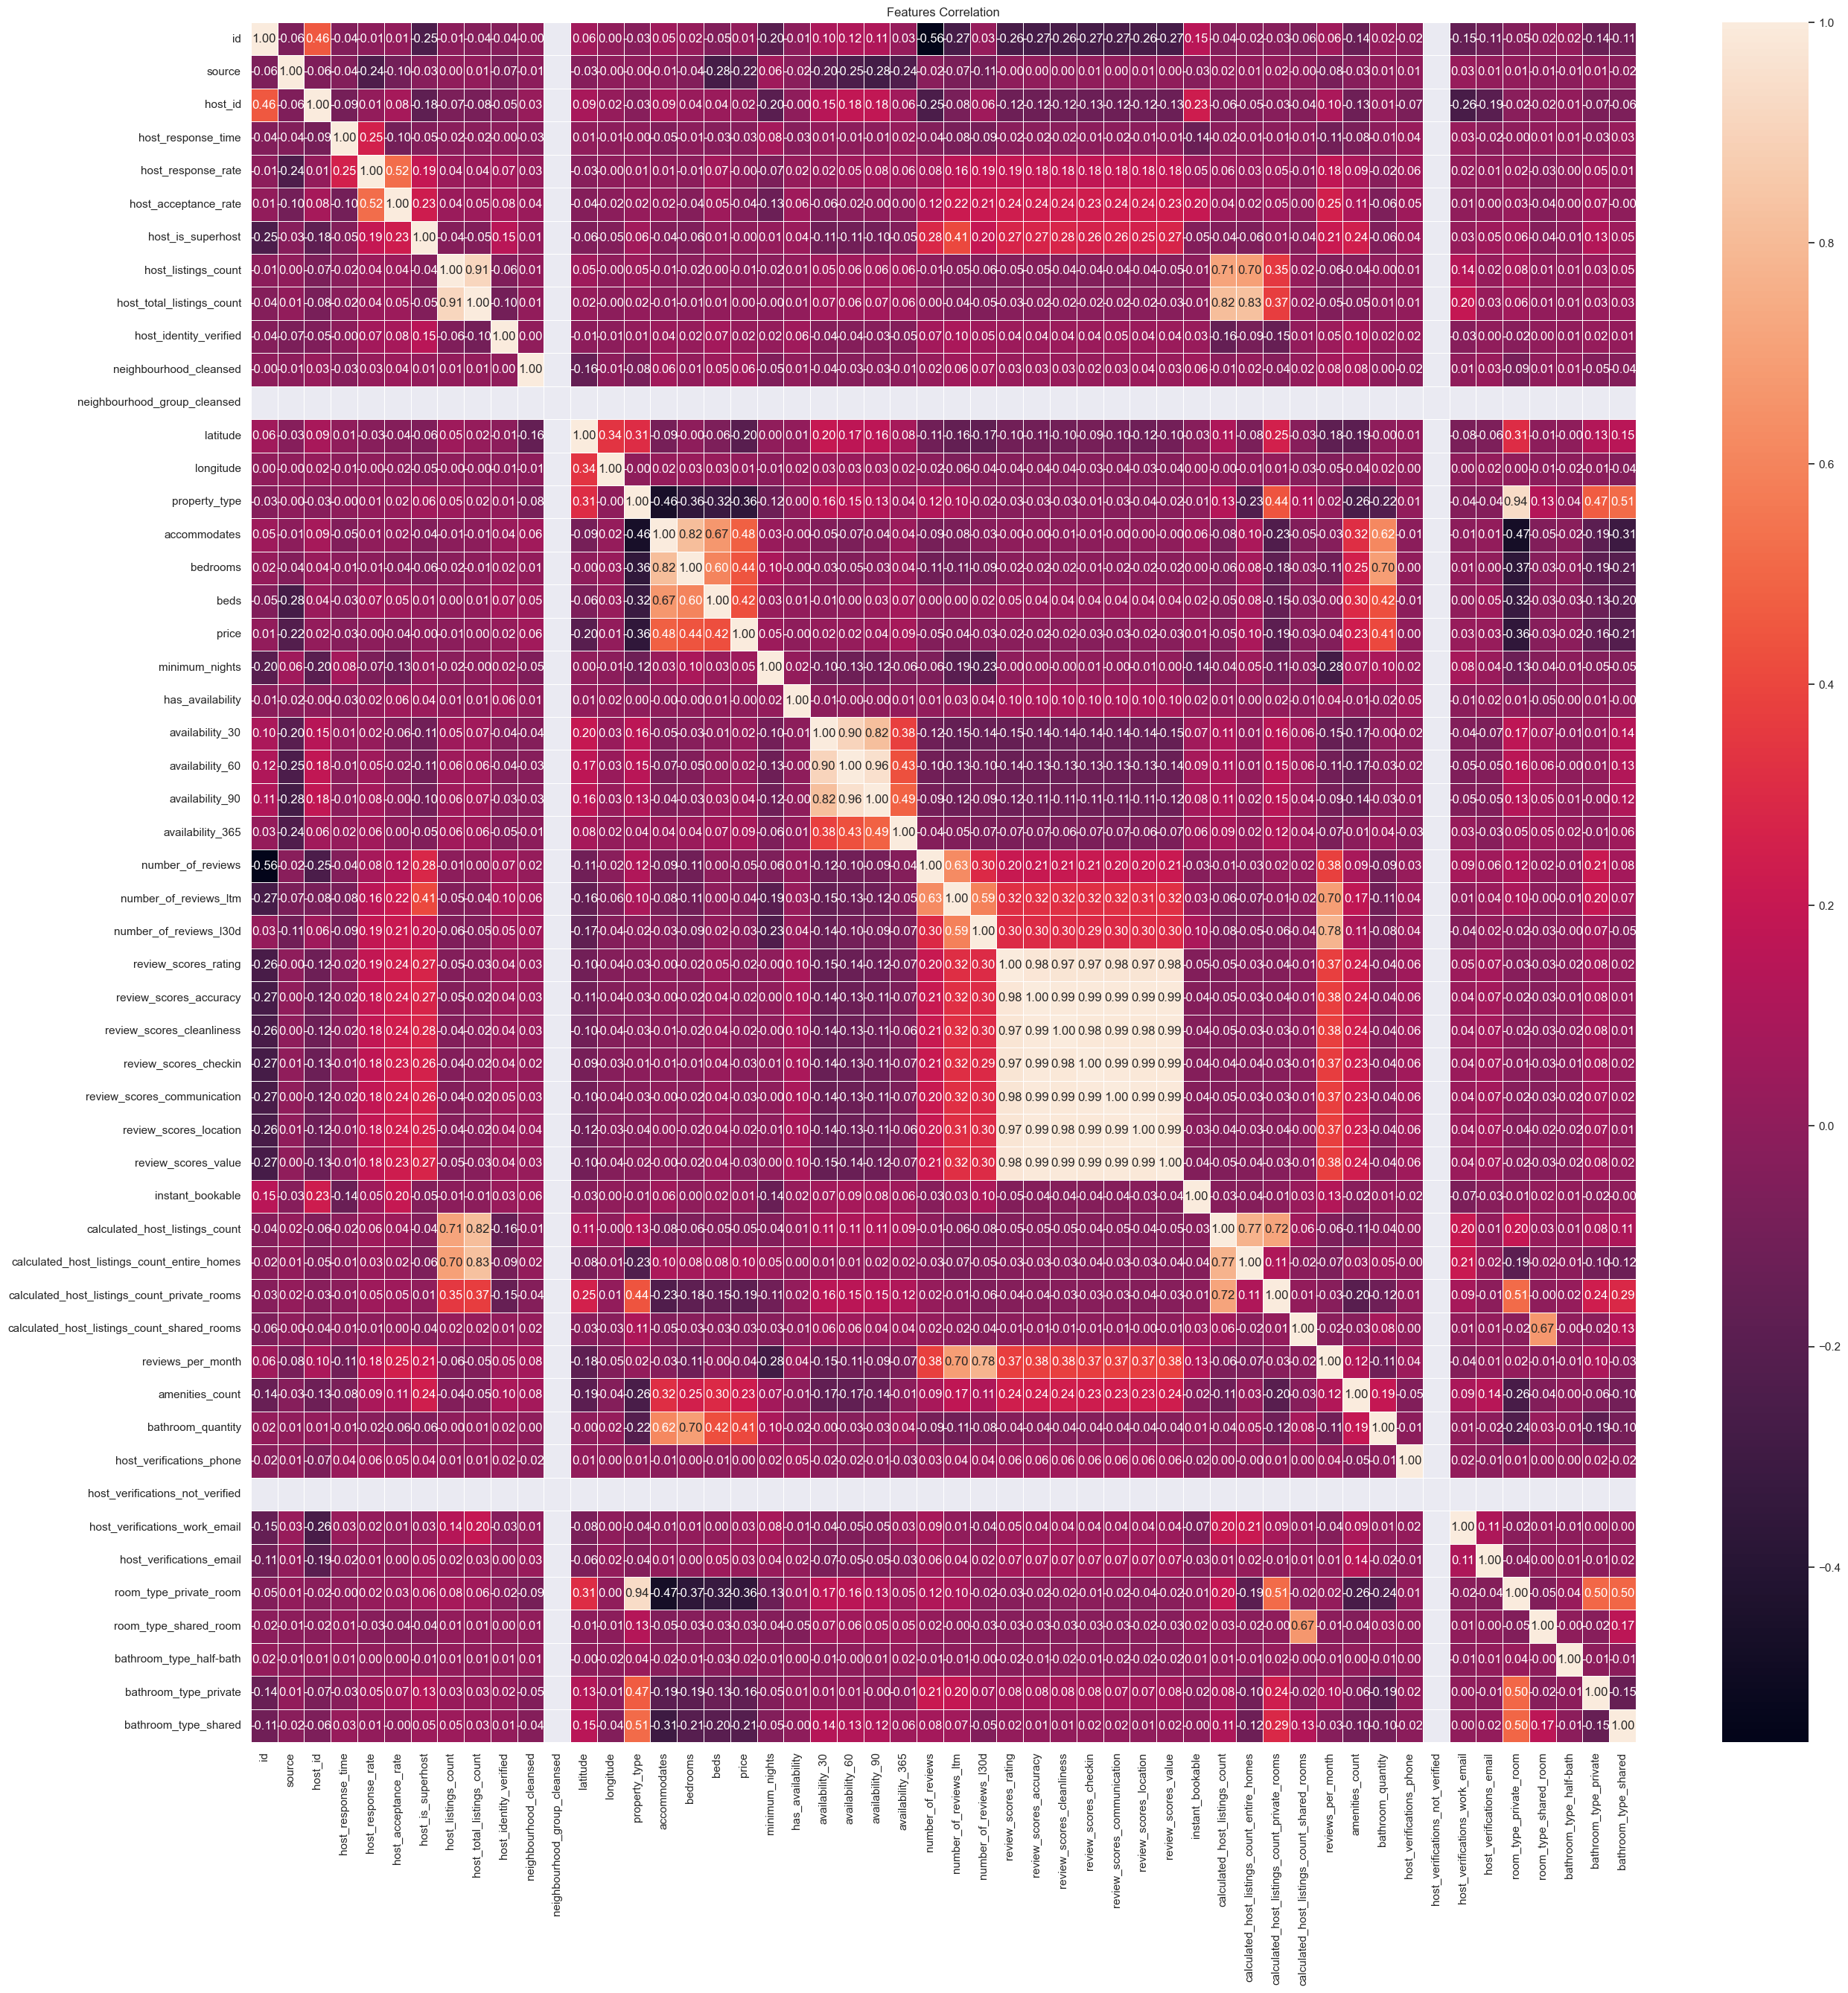

In [106]:
fig, ax = plt.subplots(figsize=(30,30)) 

corr = ny_listing_dataset.corr()

kot = corr[corr.apply(lambda x: abs(x)>=0)]

# Generate a mask for upper traingle
#mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(kot, annot = True, #mask=mask, 
                 linewidth=.5, fmt = '.2f')
plt.title('Features Correlation');
plt.xticks(rotation = 90);

**From the heatmap we can see that host_verifications_not_verified has correlation with other columns at all. It's safe to say that we can drop the column.**

In [107]:
ny_listing_dataset.drop(['host_verifications_not_verified'], axis=1, inplace=True)

### We have a lot of featurues with high correlation value, so I will drop some features with correlation value > 0.85

In [108]:
#finding correlation matrix
corr_matrix = ny_listing_dataset.corr().abs()
#getting high correlation attributes
high_corr_var=np.where(corr_matrix>0.85)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

print(high_corr_var)

[('host_listings_count', 'host_total_listings_count'), ('property_type', 'room_type_private_room'), ('availability_30', 'availability_60'), ('availability_60', 'availability_90'), ('review_scores_rating', 'review_scores_accuracy'), ('review_scores_rating', 'review_scores_cleanliness'), ('review_scores_rating', 'review_scores_checkin'), ('review_scores_rating', 'review_scores_communication'), ('review_scores_rating', 'review_scores_location'), ('review_scores_rating', 'review_scores_value'), ('review_scores_accuracy', 'review_scores_cleanliness'), ('review_scores_accuracy', 'review_scores_checkin'), ('review_scores_accuracy', 'review_scores_communication'), ('review_scores_accuracy', 'review_scores_location'), ('review_scores_accuracy', 'review_scores_value'), ('review_scores_cleanliness', 'review_scores_checkin'), ('review_scores_cleanliness', 'review_scores_communication'), ('review_scores_cleanliness', 'review_scores_location'), ('review_scores_cleanliness', 'review_scores_value'), (

In [109]:
#creating a list of columns where high correlation value exists
drop_corr_var = []
for num in enumerate(high_corr_var):
   drop_corr_var.append(num[1][1])

drop_corr_var

['host_total_listings_count',
 'room_type_private_room',
 'availability_60',
 'availability_90',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'review_scores_location',
 'review_scores_value',
 'review_scores_value']

In [110]:
#removing duplicates
drop_corr_var = set(drop_corr_var)
print(drop_corr_var)

{'availability_60', 'review_scores_communication', 'review_scores_location', 'review_scores_checkin', 'review_scores_value', 'host_total_listings_count', 'availability_90', 'room_type_private_room', 'review_scores_accuracy', 'review_scores_cleanliness'}


In [111]:
#removing columns that are not necessary as well as have high correlation
column_to_drop = ['calculated_host_listings_count_entire_homes','host_total_listings_count', 'availability_60', 
                  'availability_90','calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_entire_homes',
                 'id','latitude','longitude','availability_30', 'availability_365', 'review_scores_location',
                 'calculated_host_listings_count_shared_rooms', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
                 'calculated_host_listings_count']

ny_listing_dataset.drop(columns=column_to_drop, axis=1, inplace=True)

## We will use Mutual Information method to select features which is best for our data.  This will compute the interconnectivity of the features and give us the opportunity to chose values which can represent the underlying feature decision set without using values that are overly internally related.

In [112]:
ny_listing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 19 to 21114
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   source                         6659 non-null   int32  
 1   host_id                        6659 non-null   int64  
 2   host_response_time             6659 non-null   float64
 3   host_response_rate             6659 non-null   float64
 4   host_acceptance_rate           6659 non-null   float64
 5   host_is_superhost              6659 non-null   int64  
 6   host_listings_count            6659 non-null   float64
 7   host_identity_verified         6659 non-null   int64  
 8   neighbourhood_cleansed         6659 non-null   int32  
 9   neighbourhood_group_cleansed   6659 non-null   int64  
 10  property_type                  6659 non-null   int32  
 11  accommodates                   6659 non-null   int64  
 12  bedrooms                       6659 non-null  

In [113]:
X = ny_listing_dataset.drop(['price'], axis=1)
Y = ny_listing_dataset[['price']]

X = X.drop(['host_id'], axis=1)

### From the Mutual Information Table, we can see the attributes which have most interconnectivity with our desired column, But among these we will take top 15 attributes.

## Selected Attributes
**bathroom_quantity, accommodates, bedrooms, beds, property_type, neighbourhood_group_cleansed, review_scores_rating,
review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_accuracy,  review_scores_value, host_acceptance_rate, bathroom_type_shared**


## For replacing outliers we will check mutual information for minimum_nights and replacing NaN we will check mutual information for review_score_accuracy

#### From the Mutual Information Score we can see that, for replacing the NaN in the review_scores_accuracy column which other columns information are the most important. From these we will take top 15 features and they are:

**review_scores_rating, review_scores_value, review_scores_cleanliness, review_scores_communication, review_scores_checkin, host_is_superhost, amenities_count, number_of_reviews, host_acceptance_rate, host_response_rate, property_type, minimum_nights, host_response_time, neighbourhood_group_cleansed,
instant_bookable**


### From the mutual information we can see which attributes are important for our analysis.

**Most Common Features:  
property_type, review_scores_rating, review_scores_checkin,review_scores_communication, review_scores_value, neighbourhood_group_cleansed, host_acceptance_rate**

**Present in 2 Mutual Information:
accommodates, review_scores_cleanliness, review_scores_accuracy,instant_bookable, host_response_time**

**Unique in Mutual Information:
bathroom_quantity, bedrooms, beds, bathroom_type_shared, room_type_house, room_type_private_room, host_listings_count, amenities_count, host_is_superhost, number_of_reviews, host_response_rate, minimum_nights**

### These will be features for our models 


In [114]:
#creating a list for features
features = ['property_type', 'review_scores_rating', 'review_scores_checkin','review_scores_communication', 
            'review_scores_value', 'neighbourhood_group_cleansed', 'host_acceptance_rate', 'accommodates', 
            'review_scores_cleanliness', 'review_scores_accuracy','instant_bookable', 'host_response_time', 
            'bathroom_quantity', 'bedrooms', 'beds', 'bathroom_type_shared', 'room_type_house', 'room_type_private_room', 
            'host_listings_count', 'amenities_count', 'host_is_superhost', 'number_of_reviews', 'host_response_rate', 
            'minimum_nights','price']



In [115]:
#getting the list for dataset columns
all_column_names = ny_listing_dataset.columns.to_list()
#getting columns names which will be dropped
dropping_column_names = list(set(all_column_names) - set(features))

print(dropping_column_names)
#dropping rest of the columns
ny_listing_dataset.drop(columns=dropping_column_names, axis=1, inplace=True)

ny_listing_dataset.info()

['host_verifications_email', 'has_availability', 'host_verifications_work_email', 'bathroom_type_half-bath', 'host_verifications_phone', 'reviews_per_month', 'source', 'host_identity_verified', 'host_id', 'room_type_shared_room', 'bathroom_type_private', 'neighbourhood_cleansed']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 19 to 21114
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            6659 non-null   float64
 1   host_response_rate            6659 non-null   float64
 2   host_acceptance_rate          6659 non-null   float64
 3   host_is_superhost             6659 non-null   int64  
 4   host_listings_count           6659 non-null   float64
 5   neighbourhood_group_cleansed  6659 non-null   int64  
 6   property_type                 6659 non-null   int32  
 7   accommodates                  6659 non-null   int64  
 8   bedrooms       

**We will run our model based on this features. But to remove outliers and replace NaN values, we need to bring all datasets in the same order and scaled them with the same scaling.**

In [116]:
columns_to_remove = ['id','host_id', 'source', 'host_since', 'latitude', 'longitude', 'host_total_listings_count', 'availability_30',
                      'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
                      'review_scores_location', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                      'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_verifications',
                      'host_identity_verified', 'first_review', 'last_review', 'neighbourhood_cleansed']

test_df_min_nights.drop(columns=columns_to_remove, axis=1, inplace=True)

test_df_review_score_accuracy.drop(columns=columns_to_remove, axis=1, inplace=True)



In [117]:
test_df_min_nights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10717 to 2075
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            1237 non-null   object 
 1   host_response_rate            1237 non-null   float64
 2   host_acceptance_rate          1320 non-null   float64
 3   host_is_superhost             1969 non-null   object 
 4   host_listings_count           2000 non-null   float64
 5   neighbourhood_group_cleansed  0 non-null      float64
 6   property_type                 2000 non-null   object 
 7   room_type                     2000 non-null   object 
 8   accommodates                  2000 non-null   int64  
 9   bathrooms_text                1999 non-null   object 
 10  bedrooms                      1814 non-null   float64
 11  beds                          1328 non-null   float64
 12  amenities                     2000 non-null   object 
 13 

In [118]:
test_df_min_nights['host_response_time'] = test_df_min_nights['host_response_time'].fillna('Not Mentioned')
test_df_review_score_accuracy['host_response_time'] = test_df_review_score_accuracy['host_response_time'].fillna('Not Mentioned')

In [119]:
boolean_columns = ['host_is_superhost','has_availability','instant_bookable']

for boolean_col in boolean_columns:
    test_df_min_nights[boolean_col].replace({'t|T': 1, 'f|F': 0}, regex=True, inplace=True)
    test_df_review_score_accuracy[boolean_col].replace({'t|T': 1, 'f|F': 0}, regex=True, inplace=True)

In [120]:
#Removing Brackets and Special Characters from ammenities column
test_df_min_nights.amenities.replace(r'[\[\]\"\'\.]', '', regex=True, inplace=True)
test_df_min_nights.amenities.replace(to_replace=r"\\u", value=" ", regex=True, inplace=True)
test_df_min_nights.amenities.replace(to_replace=r"\\", value=" ", regex=True, inplace=True)
test_df_min_nights.amenities.str.lower()

test_df_min_nights['amenities_count'] = test_df_min_nights['amenities'].str.split(',').str.len()



#Removing Brackets and Special Characters from ammenities column
test_df_review_score_accuracy.amenities.replace(r'[\[\]\"\'\.]', '', regex=True, inplace=True)
test_df_review_score_accuracy.amenities.replace(to_replace=r"\\u", value=" ", regex=True, inplace=True)
test_df_review_score_accuracy.amenities.replace(to_replace=r"\\", value=" ", regex=True, inplace=True)
test_df_review_score_accuracy.amenities.str.lower()

test_df_review_score_accuracy['amenities_count'] = test_df_review_score_accuracy['amenities'].str.split(',').str.len()


In [121]:
#replacing categories of houses/hotels/apartments
test_df_min_nights = test_df_min_nights.replace({
                            'Private room in rental unit' : 'private_room',
                            'Entire rental unit' : 'house',
                            'Entire townhouse' : 'house',
                            'Room in boutique hotel' : 'hotel',
                            'Private room in bed and breakfast' : 'private_room', 
                            'Private room in townhouse' : 'private_room',
                            'Private room in home' : 'private_room', 
                            'Private room in condo' : 'private_room',
                            'Private room in loft' : 'private_room', 
                            'Entire guesthouse' : 'house', 
                            'Entire guest suite' : 'house',
                            'Entire loft' : 'house', 
                            'Private room in guest suite' : 'private_room',
                            'Entire serviced apartment' : 'apartment', 
                            'Entire condo' : 'house', 
                            'Entire home' : 'house',
                            'Shared room in loft' : 'shared_room', 
                            'Shared room in rental unit' : 'shared_room',
                            'Private room in houseboat' :  'private_room', 
                            'Shared room in home' : 'shared_room', 
                            'Private room' : 'private_room',
                            'Entire place' : 'house', 
                            'Private room in guesthouse' : 'private_room', 
                            'Boat' : 'other',
                            'Room in aparthotel' : 'apartment', 
                            'Room in serviced apartment' : 'apartment',
                            'Private room in religious building' : 'private_room', 
                            'Entire cottage' : 'house',
                            'Private room in serviced apartment' : 'private_room', 
                            'Cave' : 'other', 
                            'Tiny home' : 'house',
                            'Entire bungalow' : 'house', 
                            'Shared room in condo' : 'shared_room', 
                            'Floor' : 'private_room',
                            'Private room in hostel' : 'private_room', 
                            'Private room in casa particular' : 'private_room',
                            'Room in hotel' : 'hotel', 
                            'Shared room in townhouse' : 'shared_room',
                            'Private room in bungalow' : 'private_room', 
                            'Houseboat' : 'other', 
                            'Private room in resort' : 'private_room',
                            'Entire villa' : 'house', 
                            'Shared room in guest suite' : 'shared_room',
                            'Private room in villa' : 'private_room', 
                            'Shared room in floor' : 'shared_room',
                            'Private room in floor' : 'private_room', 
                            'Entire bed and breakfast' : 'house',
                            'Entire home/apt' : 'house', 
                            'Private room in tent' : 'private_room',
                            'Private room in in-law' : 'private_room', 
                            'Shared room in hostel' : 'shared_room',
                            'Room in resort' : 'private_room', 
                            'Shared room in guesthouse' : 'shared_room',
                            'Shared room in bed and breakfast' : 'shared_room', 
                            'Private room in farm stay' : 'private_room',
                            'Private room in dorm' : 'private_room', 
                            'Room in bed and breakfast' : 'private_room',
                            'Private room in tiny home' : 'private_room', 
                            'Shared room in serviced apartment' : 'shared_room',
                            'Shared room in bungalow' : 'shared_room', 
                            'Private room in earthen home' : 'private_room',
                            'Private room in barn' : 'private_room', 
                            'Private room in cottage' : 'private_room', 
                            'Lighthouse' : 'house',
                            'Private room in train' : 'private_room', 
                            'Barn' : 'house', 
                            'Private room in lighthouse' : 'private_room',
                            'Casa particular' : 'house', 
                            'Camper/RV' : 'other', 
                            'Private room in camper/rv' : 'private_room',
                            'Private room in vacation home' : 'private_room', 
                            'Castle' : 'other', 
                            'Tent' : 'other', 
                            'Tower' : 'other',
                            'Entire vacation home' : 'house', 
                            'Shared room in vacation home' : 'shared_room',
                            'Private room in minsu' : 'private_room', 
                            'Shared room' : 'shared_room',
                            'Shared room in casa particular' : 'shared_room'  
                        })


#replacing categories of houses/hotels/apartments
test_df_review_score_accuracy = test_df_review_score_accuracy.replace({
                            'Private room in rental unit' : 'private_room',
                            'Entire rental unit' : 'house',
                            'Entire townhouse' : 'house',
                            'Room in boutique hotel' : 'hotel',
                            'Private room in bed and breakfast' : 'private_room', 
                            'Private room in townhouse' : 'private_room',
                            'Private room in home' : 'private_room', 
                            'Private room in condo' : 'private_room',
                            'Private room in loft' : 'private_room', 
                            'Entire guesthouse' : 'house', 
                            'Entire guest suite' : 'house',
                            'Entire loft' : 'house', 
                            'Private room in guest suite' : 'private_room',
                            'Entire serviced apartment' : 'apartment', 
                            'Entire condo' : 'house', 
                            'Entire home' : 'house',
                            'Shared room in loft' : 'shared_room', 
                            'Shared room in rental unit' : 'shared_room',
                            'Private room in houseboat' :  'private_room', 
                            'Shared room in home' : 'shared_room', 
                            'Private room' : 'private_room',
                            'Entire place' : 'house', 
                            'Private room in guesthouse' : 'private_room', 
                            'Boat' : 'other',
                            'Room in aparthotel' : 'apartment', 
                            'Room in serviced apartment' : 'apartment',
                            'Private room in religious building' : 'private_room', 
                            'Entire cottage' : 'house',
                            'Private room in serviced apartment' : 'private_room', 
                            'Cave' : 'other', 
                            'Tiny home' : 'house',
                            'Entire bungalow' : 'house', 
                            'Shared room in condo' : 'shared_room', 
                            'Floor' : 'private_room',
                            'Private room in hostel' : 'private_room', 
                            'Private room in casa particular' : 'private_room',
                            'Room in hotel' : 'hotel', 
                            'Shared room in townhouse' : 'shared_room',
                            'Private room in bungalow' : 'private_room', 
                            'Houseboat' : 'other', 
                            'Private room in resort' : 'private_room',
                            'Entire villa' : 'house', 
                            'Shared room in guest suite' : 'shared_room',
                            'Private room in villa' : 'private_room', 
                            'Shared room in floor' : 'shared_room',
                            'Private room in floor' : 'private_room', 
                            'Entire bed and breakfast' : 'house',
                            'Entire home/apt' : 'house', 
                            'Private room in tent' : 'private_room',
                            'Private room in in-law' : 'private_room', 
                            'Shared room in hostel' : 'shared_room',
                            'Room in resort' : 'private_room', 
                            'Shared room in guesthouse' : 'shared_room',
                            'Shared room in bed and breakfast' : 'shared_room', 
                            'Private room in farm stay' : 'private_room',
                            'Private room in dorm' : 'private_room', 
                            'Room in bed and breakfast' : 'private_room',
                            'Private room in tiny home' : 'private_room', 
                            'Shared room in serviced apartment' : 'shared_room',
                            'Shared room in bungalow' : 'shared_room', 
                            'Private room in earthen home' : 'private_room',
                            'Private room in barn' : 'private_room', 
                            'Private room in cottage' : 'private_room', 
                            'Lighthouse' : 'house',
                            'Private room in train' : 'private_room', 
                            'Barn' : 'house', 
                            'Private room in lighthouse' : 'private_room',
                            'Casa particular' : 'house', 
                            'Camper/RV' : 'other', 
                            'Private room in camper/rv' : 'private_room',
                            'Private room in vacation home' : 'private_room', 
                            'Castle' : 'other', 
                            'Tent' : 'other', 
                            'Tower' : 'other',
                            'Entire vacation home' : 'house', 
                            'Shared room in vacation home' : 'shared_room',
                            'Private room in minsu' : 'private_room', 
                            'Shared room' : 'shared_room',
                            'Shared room in casa particular' : 'shared_room'  
                        })

In [122]:
test_df_min_nights = test_df_min_nights.replace({
    'Hotel room' : 'hotel_room'
})


test_df_review_score_accuracy = test_df_review_score_accuracy.replace({
    'Hotel room' : 'hotel_room'
})


In [123]:
test_df_min_nights['bathroom_quantity'] = test_df_min_nights['bathrooms_text'].str.split(' ', expand=True)[0]
test_df_min_nights['bathroom_type'] = test_df_min_nights['bathrooms_text'].str.split(' ', expand=True)[1]

test_df_review_score_accuracy['bathroom_quantity'] = test_df_review_score_accuracy['bathrooms_text'].str.split(' ', expand=True)[0]
test_df_review_score_accuracy['bathroom_type'] = test_df_review_score_accuracy['bathrooms_text'].str.split(' ', expand=True)[1]


In [124]:
test_df_review_score_accuracy.bathroom_quantity.unique()

array(['1.5', '1', '2', '3.5', '4.5', '2.5', 'Shared', '3', '0', '4',
       'Half-bath', '5.5', nan, '6', '5'], dtype=object)

In [125]:
test_df_min_nights.bathroom_quantity.replace({
    'Shared' : '1',
    'Half-bath' : '0.5',
    'Private' : '1',
    'bath' : '1'
}, inplace=True)

test_df_review_score_accuracy.bathroom_quantity.replace({
    'Shared' : '1',
    'Half-bath' : '0.5',
    'Private' : '1',
    'bath' : '1'
}, inplace=True)

In [126]:
test_df_min_nights['bathroom_quantity'] = test_df_min_nights['bathroom_quantity'].astype(float)
test_df_review_score_accuracy['bathroom_quantity'] = test_df_review_score_accuracy['bathroom_quantity'].astype(float)

In [127]:
test_df_min_nights.replace(to_replace=[None], value='bath', inplace=True)
test_df_review_score_accuracy.replace(to_replace=[None], value='bath', inplace=True)

In [128]:
test_df_min_nights.bathroom_type.replace({
    'baths' : 'bath'
}, inplace=True)


test_df_review_score_accuracy.bathroom_type.replace({
    'baths' : 'bath'
}, inplace=True)


In [129]:
test_df_min_nights.drop(['bathrooms_text','amenities'], axis=1, inplace=True)
test_df_review_score_accuracy.drop(['bathrooms_text','amenities'], axis=1, inplace=True)

In [130]:
test_df_min_nights.host_response_time.unique()

array(['within an hour', 'Not Mentioned', 'within a few hours',
       'a few days or more', 'within a day'], dtype=object)

In [131]:
test_df_min_nights['neighbourhood_group_cleansed'] = le.fit_transform(test_df_min_nights['neighbourhood_group_cleansed'])
test_df_min_nights['property_type'] = le.fit_transform(test_df_min_nights['property_type'])

# ordinal encoding methods
test_df_min_nights = test_df_min_nights.replace({
    'Not Mentioned': 0.0, 
    'within an hour': 1.0,
    'within a few hours': 2.0,
    'within a day': 3.0,
    'a few days or more': 4.0
})



test_df_review_score_accuracy['neighbourhood_group_cleansed'] = le.fit_transform(test_df_review_score_accuracy['neighbourhood_group_cleansed'])
test_df_review_score_accuracy['property_type'] = le.fit_transform(test_df_review_score_accuracy['property_type'])

# ordinal encoding methods
test_df_review_score_accuracy = test_df_review_score_accuracy.replace({
    'Not Mentioned': 0.0, 
    'within an hour': 1.0,
    'within a few hours': 2.0,
    'within a day': 3.0,
    'a few days or more': 4.0
})

In [132]:
cat_cols = ['room_type','bathroom_type']

#converting categorical values to str
test_df_min_nights[cat_cols] = test_df_min_nights[cat_cols].astype('str')
test_df_review_score_accuracy[cat_cols] = test_df_review_score_accuracy[cat_cols].astype('str')



#encoding training dataset with get_dummies
test_df_min_nights = pd.get_dummies(test_df_min_nights, drop_first=True)
test_df_review_score_accuracy = pd.get_dummies(test_df_review_score_accuracy, drop_first=True)


In [133]:
#filling the columns with 0 for test_df_min_nights
test_df_min_nights.update(test_df_min_nights.select_dtypes(include=[int, np.float32, np.float64]).fillna(0))


#filling the columns with 0 except for review_scores_accuracy in test_df_review_score_accuracy
all_columns = test_df_review_score_accuracy.select_dtypes(include=[int, np.float32, np.float64]).columns.to_list()
nan_column = ['review_scores_accuracy']
all_columns_without_nan = list(set(all_columns) - set(nan_column))
test_df_review_score_accuracy[all_columns_without_nan] = test_df_review_score_accuracy[all_columns_without_nan].fillna(0)

In [134]:
test_df_min_nights.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_group_cleansed,property_type,accommodates,bedrooms,beds,...,review_scores_communication,review_scores_value,instant_bookable,reviews_per_month,amenities_count,bathroom_quantity,room_type_private_room,room_type_shared_room,bathroom_type_private,bathroom_type_shared
10717,1.0,1.00,0.93,1.0,2.0,0,2,8,4.0,0.0,...,4.98,4.76,0,2.22,58,2.5,0,0,0,0
14242,0.0,0.00,1.00,0.0,1.0,0,4,2,0.0,0.0,...,0.00,0.00,0,0.00,25,1.0,1,0,1,0
13655,1.0,1.00,0.85,1.0,1.0,0,2,8,2.0,4.0,...,5.00,4.91,0,2.59,55,1.5,0,0,0,0
19818,1.0,0.98,0.97,1.0,29.0,0,2,5,2.0,0.0,...,0.00,0.00,1,0.00,36,2.0,0,0,0,0
7857,1.0,1.00,0.94,1.0,24.0,0,2,3,1.0,0.0,...,0.00,0.00,0,0.00,18,1.0,0,0,0,0


In [135]:
test_df_review_score_accuracy.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_group_cleansed,property_type,accommodates,bedrooms,beds,...,review_scores_value,instant_bookable,reviews_per_month,amenities_count,bathroom_quantity,room_type_private_room,room_type_shared_room,bathroom_type_half-bath,bathroom_type_private,bathroom_type_shared
1475,0.0,0.0,0.00,0.0,1.0,0,5,4,2.0,0.0,...,0.0,0,0.0,11,1.5,0,0,0,0,0
19965,1.0,0.9,0.79,0.0,9.0,0,5,2,1.0,1.0,...,0.0,0,0.0,26,1.0,0,0,0,0,0
19600,2.0,0.9,0.71,1.0,37.0,0,5,3,1.0,1.0,...,0.0,0,0.0,47,1.0,0,0,0,0,0
19738,2.0,1.0,0.90,0.0,6.0,0,7,2,1.0,1.0,...,0.0,0,0.0,45,1.0,1,0,0,0,0
20572,1.0,1.0,1.00,0.0,6.0,0,7,2,1.0,0.0,...,0.0,1,0.0,11,1.0,1,0,0,0,1


In [136]:
x = test_df_min_nights.columns.to_list()
y = test_df_review_score_accuracy.columns.to_list()

z = list(set(x) - set(y))
print(z)

[]


In [137]:
train_dataset_columns = ny_listing_dataset.columns.to_list()
test_dataset_columns_min_nights = test_df_min_nights.columns.to_list()
test_dataset_columns_score = test_df_review_score_accuracy.columns.to_list()


removing_column_names_for_min_nights = list(set(test_dataset_columns_min_nights) - set(train_dataset_columns))
removing_column_names_for_score = list(set(test_dataset_columns_score) - set(train_dataset_columns))



In [138]:
test_df_min_nights.drop(columns=removing_column_names_for_min_nights, axis=1, inplace=True)
test_df_review_score_accuracy.drop(columns=removing_column_names_for_score, axis=1, inplace=True)

In [139]:
listings = ny_listing_dataset.columns.to_list()

min_nights = test_df_min_nights.columns.to_list()

rev_score = test_df_review_score_accuracy.columns.to_list()



print(list(set(listings) - set(min_nights)))
print(list(set(listings) - set(rev_score)))


print(list(set(min_nights) - set(listings)))
print(list(set(min_nights) - set(rev_score)))


print(list(set(rev_score) - set(listings)))
print(list(set(rev_score) - set(min_nights)))

print(len(listings))
print(len(min_nights))
print(len(rev_score))


[]
[]
[]
[]
[]
[]
24
24
24


**Out Test and Train dataset are all in the same shape**

## Scaling

In [140]:
def plot_histograms_density(df, columns, df_transformed, fig_title):
    fig, axs = plt.subplots(len(columns),2,figsize=(15,65), constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        ny_listing_dataset[c].hist(ax=axs[i], density=True) # normalizes the density
        ny_listing_dataset[c].plot.density(ax=axs[i], title=c)
        df_transformed[c].hist(ax=axs[i+1], density=True, stacked=True) # normalizes the density
        df_transformed[c].plot.density(ax=axs[i+1], title=str(c+'_transformed'))
        i+=2

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

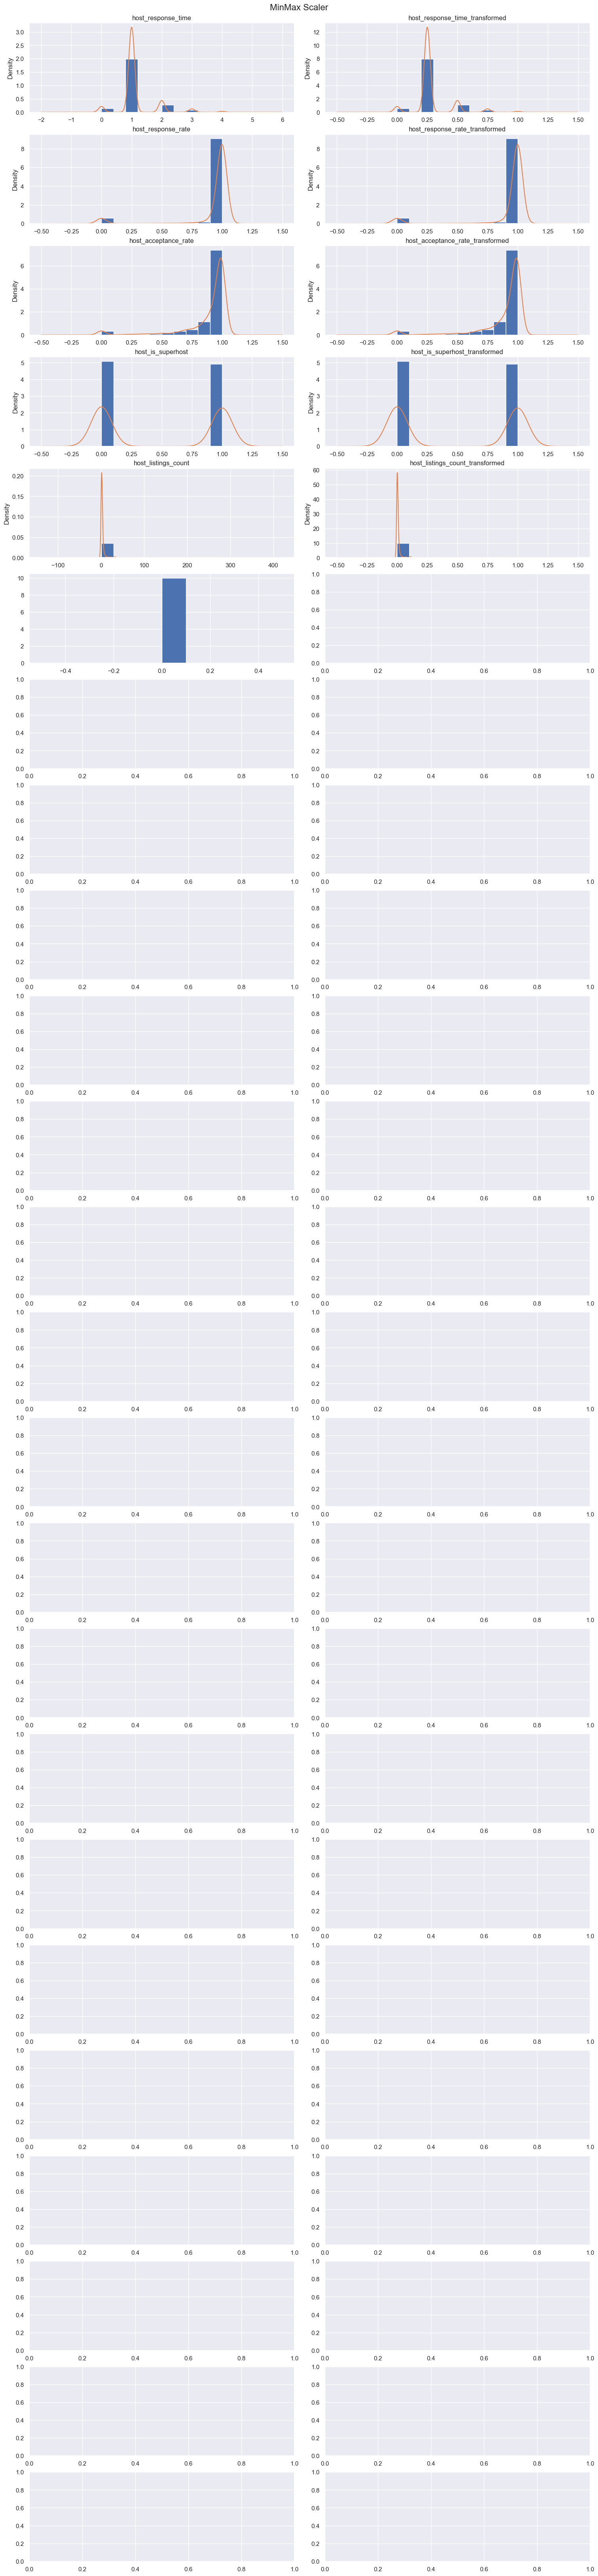

In [141]:
# transform the data
scaler = MinMaxScaler()
min_max_tdf = scaler.fit_transform(ny_listing_dataset)
min_max_tdf = pd.DataFrame(min_max_tdf, index=ny_listing_dataset.index, columns=ny_listing_dataset.columns)

plot_histograms_density(ny_listing_dataset, train_dataset_columns, min_max_tdf, 'MinMax Scaler');

In [ ]:
# transform the data
scaler = MaxAbsScaler()
maxabs_tdf = scaler.fit_transform(ny_listing_dataset)
maxabs_tdf = pd.DataFrame(maxabs_tdf, index=ny_listing_dataset.index, columns=ny_listing_dataset.columns)

plot_histograms_density(ny_listing_dataset, train_dataset_columns, maxabs_tdf, 'MaxAbs Scaler')

In [ ]:
# transform the data
scaler = RobustScaler()
robust_tdf = scaler.fit_transform(ny_listing_dataset)
robust_tdf = pd.DataFrame(robust_tdf, index=ny_listing_dataset.index, columns=ny_listing_dataset.columns)

plot_histograms_density(ny_listing_dataset, train_dataset_columns, robust_tdf, 'Robust Scaler')

In [ ]:
#trnasform the data
scaler = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
qtl_tdf = scaler.fit_transform(ny_listing_dataset)
qtl_tdf = pd.DataFrame(qtl_tdf, index=ny_listing_dataset.index, columns=ny_listing_dataset.columns)

plot_histograms_density(ny_listing_dataset, train_dataset_columns, qtl_tdf, 'Quantile Scaler')

In [ ]:
#transform the data
scaler = Normalizer()
zscore_tdf = scaler.fit_transform(ny_listing_dataset)
zscore_tdf = pd.DataFrame(zscore_tdf, index=ny_listing_dataset.index, columns=ny_listing_dataset.columns)

plot_histograms_density(ny_listing_dataset, train_dataset_columns, zscore_tdf, 'Z-score Scaler')


In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True)
power_tdf = pt.fit_transform(ny_listing_dataset)
power_tdf = pd.DataFrame(power_tdf, index=ny_listing_dataset.index, columns=ny_listing_dataset.columns)

power_tdf.hist(figsize=(20,20), bins=25);

In [ ]:
def plot_histograms_density_for_scalers(df, columns, fig_title, scalers, scaler_names):
    fig, axs = plt.subplots(len(columns),len(scalers)+1,figsize=(25,65),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        ny_listing_dataset[c].hist(ax=axs[i], density=True) # normalizes the density
        ny_listing_dataset[c].plot.density(ax=axs[i], title=c)
        i+=1
        for j in range(len(scalers)):
            df_transformed = scalers[j].fit_transform(df)
            df_transformed = pd.DataFrame(df_transformed, index=df.index, columns=df.columns)
            df_transformed[c].hist(ax=axs[i], density=True, stacked=True) # normalizes the density
            df_transformed[c].plot.density(ax=axs[i], title=scaler_names[j])
            i+=1

scaler_names = ['MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile', 'Log']
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal'),FunctionTransformer(np.log1p)]
plot_histograms_density_for_scalers(ny_listing_dataset, train_dataset_columns, 'Scalers effect on data', arr_scalers, scaler_names)
            

In [156]:
price_features = ['bathroom_quantity', 'accommodates', 'bedrooms', 'beds', 'property_type', 'neighbourhood_group_cleansed', 
                  'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                  'review_scores_accuracy', 'review_scores_value', 'host_acceptance_rate', 'bathroom_type_shared', 
                  'host_listings_count', 'price']


nights_feature = ['property_type','room_type_private_room', 'host_acceptance_rate', 'instant_bookable', 
                  'host_response_time', 'review_scores_communication', 'review_scores_accuracy', 'host_listings_count', 
                  'review_scores_rating', 'neighbourhood_group_cleansed', 'review_scores_checkin', 'accommodates', 
                  'review_scores_value', 'amenities_count','minimum_nights']


score_features = ['review_scores_rating', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_communication', 
                  'review_scores_checkin', 'host_is_superhost', 'amenities_count', 'number_of_reviews', 'host_acceptance_rate', 
                  'host_response_rate', 'property_type', 'minimum_nights', 'host_response_time', 'neighbourhood_group_cleansed', 
                  'instant_bookable','review_scores_accuracy']


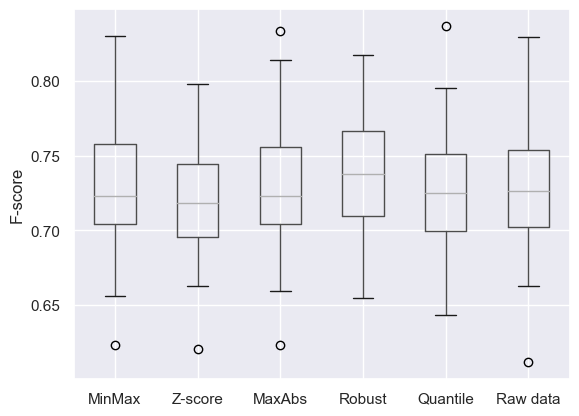

In [157]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


scaler_names = ['MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile']
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
results = {}

model = KNeighborsClassifier(n_neighbors=3)




train_ds = test_df_min_nights[nights_feature].copy()



for i in range (len(arr_scalers)):
    # X is all the other variables
    X = train_ds.drop(columns=['minimum_nights'], axis=1).to_numpy()
    # Let's tranform X     
    X_t = arr_scalers[i].fit_transform(X)
    # y is has_diabetes that we want to forecast
    y = train_ds['minimum_nights'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model, X_t, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    results[scaler_names[i]] = scores
    
    
# Now let's create the model with the raw data just to put the models side-by-side
X = train_ds.drop(columns=['minimum_nights'], axis=1).to_numpy()
y = train_ds['minimum_nights'].to_numpy()
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results['Raw data'] = scores


# Now let's create our boxplot
df_res = pd.DataFrame(results)
boxplot = df_res.boxplot() 
boxplot.set_ylabel('F-score')
plt.show()


### Prediciting missing values and outliers

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

clean_data = ny_listing_dataset[nights_feature].copy()
test_df_min_nights_data = test_df_min_nights[nights_feature].copy()


# Let's prepare the data for our model
maxabs = MaxAbsScaler()
X = clean_data.drop(['minimum_nights'], axis=1).to_numpy()
X_t = maxabs.fit_transform(X)
y = clean_data['minimum_nights'].to_numpy()
model = LinearRegression()
model.fit(X, y)
# Now let's predict the missing rows
X_to_pred = test_df_min_nights_data.drop(['minimum_nights'], axis=1).to_numpy()
y_pred = model.predict(X_to_pred)
# let's add the data to the NaN rows
test_df_min_nights_data['min_nights_pred_linear'] = y_pred


# The best for KNN was the Robust scaler
X_ = clean_data.drop(['minimum_nights'], axis=1).to_numpy()
robust = RobustScaler()
X__t = robust.fit_transform(X_)
y_ = clean_data['minimum_nights'].to_numpy()
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X__t, y_)
# Now let's use the model to predict the missing rows
X__to_pred = test_df_min_nights_data.drop(['minimum_nights','min_nights_pred_linear'], axis=1).to_numpy()
# we need to transform the data in X_to_pred (do not fit, otherwise the scaler will change the ranges)
X__t_to_pred = robust.transform(X__to_pred)
y__pred = model.predict(X__t_to_pred)
# Let's add to the NaN rows the values predicted
test_df_min_nights_data['min_nights_pred_knn'] = y__pred

test_df_min_nights_data[['minimum_nights','min_nights_pred_linear','min_nights_pred_knn']].head(50)


,minimum_nights,min_nights_pred_linear,min_nights_pred_knn
10717,28,2.167680,2.333333
14242,28,1.558271,1.666667
13655,28,2.238069,1.666667
19818,28,1.736712,2.000000
7857,300,2.075394,1.666667
879,28,2.208265,3.333333
16259,28,2.164881,2.666667
6137,28,2.098035,1.666667
6619,28,2.561873,3.000000
17421,28,2.629893,2.333333


In [159]:
test_df_min_nights_data.min_nights_pred_linear.min()

-1.0612716405601677

In [160]:
test_df_min_nights_data.min_nights_pred_linear.max()

3.476960268426315

In [161]:
test_df_min_nights_data.min_nights_pred_knn.min()

1.0

In [162]:
test_df_min_nights_data.min_nights_pred_knn.max()

6.333333333333333

In [163]:
clean_data = ny_listing_dataset[score_features].copy()
test_df_review_score_accuracy_data = test_df_review_score_accuracy[score_features].copy()


# Let's prepare the data for our model
maxabs = MaxAbsScaler()
X = clean_data.drop(['review_scores_accuracy'], axis=1).to_numpy()
X_t = maxabs.fit_transform(X)
y = clean_data['review_scores_accuracy'].to_numpy()
model = LinearRegression()
model.fit(X, y)
# Now let's predict the missing rows
X_to_pred = test_df_review_score_accuracy_data.drop(['review_scores_accuracy'], axis=1).to_numpy()
y_pred = model.predict(X_to_pred)
# let's add the data to the NaN rows
test_df_review_score_accuracy_data['review_scores_accuracy_pred_linear'] = y_pred


# The best for KNN was the Robust scaler
X_ = clean_data.drop(['review_scores_accuracy'], axis=1).to_numpy()
robust = RobustScaler()
X__t = robust.fit_transform(X_)
y_ = clean_data['review_scores_accuracy'].to_numpy()
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X__t, y_)
# Now let's use the model to predict the missing rows
X__to_pred = test_df_review_score_accuracy_data.drop(['review_scores_accuracy','review_scores_accuracy_pred_linear'], axis=1).to_numpy()
# we need to transform the data in X_to_pred (do not fit, otherwise the scaler will change the ranges)
X__t_to_pred = robust.transform(X__to_pred)
y__pred = model.predict(X__t_to_pred)
# Let's add to the NaN rows the values predicted
test_df_review_score_accuracy_data['review_scores_accuracy_knn'] = y__pred

test_df_review_score_accuracy_data[['review_scores_accuracy','review_scores_accuracy_pred_linear','review_scores_accuracy_knn']].head(50)


,review_scores_accuracy,review_scores_accuracy_pred_linear,review_scores_accuracy_knn
1475,NaN,0.079790,0.0
19965,NaN,0.075260,0.0
19600,NaN,0.020223,0.0
19738,NaN,0.005686,0.0
20572,NaN,0.017614,0.0
17221,NaN,0.182786,0.0
20916,NaN,0.032184,0.0
16550,NaN,0.005844,0.0
19075,NaN,0.076692,0.0
13660,NaN,0.065582,0.0


In [164]:
test_df_review_score_accuracy_data.review_scores_accuracy_pred_linear.min()

-0.0073792603193503226

In [165]:
test_df_review_score_accuracy_data.review_scores_accuracy_pred_linear.max()

2.8353418073603045

In [166]:
test_df_review_score_accuracy_data.review_scores_accuracy_knn.min()

0.0

In [167]:
test_df_review_score_accuracy_data.review_scores_accuracy_knn.max()

3.6666666666666665

In [168]:
test_df_min_nights_data.min_nights_pred_linear.describe()

count    2000.000000
mean        2.243487
std         0.408060
min        -1.061272
25%         1.965074
50%         2.237379
75%         2.558193
max         3.476960
Name: min_nights_pred_linear, dtype: float64

In [169]:
test_df_min_nights_data.min_nights_pred_knn.describe()

count    2000.000000
mean        2.354667
std         1.083574
min         1.000000
25%         1.666667
50%         2.000000
75%         3.000000
max         6.333333
Name: min_nights_pred_knn, dtype: float64

In [170]:
test_df_review_score_accuracy_data.review_scores_accuracy_pred_linear.describe()

count    2000.000000
mean        0.087983
std         0.127357
min        -0.007379
25%         0.062157
50%         0.073762
75%         0.080059
max         2.835342
Name: review_scores_accuracy_pred_linear, dtype: float64

In [171]:
test_df_review_score_accuracy_data.review_scores_accuracy_knn.describe()

count    2000.000000
mean        0.001833
std         0.081989
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.666667
Name: review_scores_accuracy_knn, dtype: float64

We can see that, for different feature different machine learning algorithm and different scaling technique works better. For minimum nights we will select KNN with robust scaler and for review score accuracy we will select linear algorithm with maxabs scaler

In [172]:
test_df_min_nights['minimum_nights'] = test_df_min_nights_data['min_nights_pred_knn']
test_df_min_nights.head(20)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_group_cleansed,property_type,accommodates,bedrooms,beds,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,instant_bookable,amenities_count,bathroom_quantity,room_type_private_room,bathroom_type_shared
10717,1.0,1.00,0.93,1.0,2.0,0,2,8,4.0,0.0,...,4.82,4.78,4.94,4.98,4.76,0,58,2.5,0,0
14242,0.0,0.00,1.00,0.0,1.0,0,4,2,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0,25,1.0,1,0
13655,1.0,1.00,0.85,1.0,1.0,0,2,8,2.0,4.0,...,5.00,5.00,4.97,5.00,4.91,0,55,1.5,0,0
19818,1.0,0.98,0.97,1.0,29.0,0,2,5,2.0,0.0,...,0.00,0.00,0.00,0.00,0.00,1,36,2.0,0,0
7857,1.0,1.00,0.94,1.0,24.0,0,2,3,1.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0,18,1.0,0,0
879,0.0,0.00,0.00,0.0,1.0,0,4,1,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0,12,2.0,1,0
16259,1.0,1.00,1.00,1.0,14.0,0,2,3,1.0,0.0,...,5.00,5.00,5.00,5.00,5.00,0,33,1.0,0,0
6137,1.0,1.00,1.00,0.0,1.0,0,2,3,1.0,1.0,...,4.86,4.80,4.80,4.93,4.81,0,36,1.0,0,0
6619,2.0,0.84,0.49,0.0,73.0,0,2,4,2.0,0.0,...,5.00,5.00,5.00,5.00,5.00,0,20,2.0,0,0
17421,4.0,0.14,0.81,0.0,4.0,0,2,2,1.0,1.0,...,0.00,0.00,0.00,0.00,0.00,0,27,1.0,0,0


In [173]:
test_df_review_score_accuracy['review_scores_accuracy'] = test_df_review_score_accuracy_data['review_scores_accuracy_pred_linear']
test_df_review_score_accuracy.head(20)


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_group_cleansed,property_type,accommodates,bedrooms,beds,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,instant_bookable,amenities_count,bathroom_quantity,room_type_private_room,bathroom_type_shared
1475,0.0,0.0,0.00,0.0,1.0,0,5,4,2.0,0.0,...,0.079790,0.0,0.0,0.0,0.0,0,11,1.5,0,0
19965,1.0,0.9,0.79,0.0,9.0,0,5,2,1.0,1.0,...,0.075260,0.0,0.0,0.0,0.0,0,26,1.0,0,0
19600,2.0,0.9,0.71,1.0,37.0,0,5,3,1.0,1.0,...,0.020223,0.0,0.0,0.0,0.0,0,47,1.0,0,0
19738,2.0,1.0,0.90,0.0,6.0,0,7,2,1.0,1.0,...,0.005686,0.0,0.0,0.0,0.0,0,45,1.0,1,0
20572,1.0,1.0,1.00,0.0,6.0,0,7,2,1.0,0.0,...,0.017614,0.0,0.0,0.0,0.0,1,11,1.0,1,1
17221,3.0,1.0,0.56,0.0,4.0,0,7,1,1.0,1.0,...,0.182786,0.0,0.0,0.0,0.0,0,67,1.0,1,1
20916,1.0,1.0,0.98,0.0,10.0,0,7,1,1.0,0.0,...,0.032184,0.0,0.0,0.0,0.0,1,66,1.0,1,0
16550,1.0,1.0,1.00,1.0,3.0,0,7,2,1.0,0.0,...,0.005844,0.0,0.0,0.0,0.0,0,25,2.0,1,0
19075,1.0,1.0,1.00,0.0,2.0,0,5,4,2.0,2.0,...,0.076692,0.0,0.0,0.0,0.0,0,8,2.0,0,0
13660,3.0,1.0,0.00,0.0,2.0,0,5,4,2.0,0.0,...,0.065582,0.0,0.0,0.0,0.0,0,27,2.0,0,0


In [174]:
test_df_min_nights.columns = test_df_review_score_accuracy.columns

In [175]:
test_dataset_combined = pd.concat([test_df_min_nights, test_df_review_score_accuracy], ignore_index=True)
test_dataset_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            4000 non-null   float64
 1   host_response_rate            4000 non-null   float64
 2   host_acceptance_rate          4000 non-null   float64
 3   host_is_superhost             4000 non-null   float64
 4   host_listings_count           4000 non-null   float64
 5   neighbourhood_group_cleansed  4000 non-null   int64  
 6   property_type                 4000 non-null   int32  
 7   accommodates                  4000 non-null   int64  
 8   bedrooms                      4000 non-null   float64
 9   beds                          4000 non-null   float64
 10  price                         4000 non-null   float64
 11  minimum_nights                4000 non-null   float64
 12  number_of_reviews             4000 non-null   int64  
 13  rev

In [176]:
ny_listing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 19 to 21114
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            6659 non-null   float64
 1   host_response_rate            6659 non-null   float64
 2   host_acceptance_rate          6659 non-null   float64
 3   host_is_superhost             6659 non-null   int64  
 4   host_listings_count           6659 non-null   float64
 5   neighbourhood_group_cleansed  6659 non-null   int64  
 6   property_type                 6659 non-null   int32  
 7   accommodates                  6659 non-null   int64  
 8   bedrooms                      6659 non-null   float64
 9   beds                          6659 non-null   float64
 10  price                         6659 non-null   float64
 11  minimum_nights                6659 non-null   int64  
 12  number_of_reviews             6659 non-null   int64  
 13  r

We will use KNeighborsRegressor with Robust Scaler

# Predicting Price
### Here we will be using two separate machine learning techniques to evaluate this information the first will be linear regression and the second will be K-Nearest Neighbour like in our previous outlier detection.

In [177]:
# assuming for this case that traning is - ny_listing_dataset 
# assuming for this case that testing is - test_dataset_combined

#clean_data = ny_listing_dataset[price_features].copy()
#test_data = test_dataset_combined[price_features].copy()

clean_data = ny_listing_dataset.copy()
test_data = test_dataset_combined.copy()

clean_data['price'] = clean_data['price'].astype('int64')
test_data['price'] = test_data['price'].astype('int64')

In [178]:
column_order = ['host_response_time','host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
                'neighbourhood_group_cleansed', 'property_type', 'accommodates', 'bedrooms', 'beds', 'minimum_nights',
               'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
               'review_scores_checkin', 'review_scores_communication', 'review_scores_value', 'instant_bookable',
               'amenities_count', 'bathroom_quantity','room_type_private_room', 'bathroom_type_shared',
               'price']


clean_data_ = clean_data[column_order]
test_data_ = test_data[column_order]

In [179]:
clean_data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 19 to 21114
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            6659 non-null   float64
 1   host_response_rate            6659 non-null   float64
 2   host_acceptance_rate          6659 non-null   float64
 3   host_is_superhost             6659 non-null   int64  
 4   host_listings_count           6659 non-null   float64
 5   neighbourhood_group_cleansed  6659 non-null   int64  
 6   property_type                 6659 non-null   int32  
 7   accommodates                  6659 non-null   int64  
 8   bedrooms                      6659 non-null   float64
 9   beds                          6659 non-null   float64
 10  minimum_nights                6659 non-null   int64  
 11  number_of_reviews             6659 non-null   int64  
 12  review_scores_rating          6659 non-null   float64
 13  r

In [180]:
test_data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            4000 non-null   float64
 1   host_response_rate            4000 non-null   float64
 2   host_acceptance_rate          4000 non-null   float64
 3   host_is_superhost             4000 non-null   float64
 4   host_listings_count           4000 non-null   float64
 5   neighbourhood_group_cleansed  4000 non-null   int64  
 6   property_type                 4000 non-null   int32  
 7   accommodates                  4000 non-null   int64  
 8   bedrooms                      4000 non-null   float64
 9   beds                          4000 non-null   float64
 10  minimum_nights                4000 non-null   float64
 11  number_of_reviews             4000 non-null   int64  
 12  review_scores_rating          4000 non-null   float64
 13  rev

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Let's prepare the data for our model
maxabs = MaxAbsScaler()
X = clean_data_.drop(['price'], axis=1).to_numpy()
X_t = maxabs.fit_transform(X)
y = clean_data_['price'].to_numpy()
model = LinearRegression()
model.fit(X, y)

# Now let's predict the missing rows
X_to_pred = test_data_.drop(['price'], axis=1).to_numpy()
X_to_pred = np.nan_to_num(X_to_pred)

y_pred = model.predict(X_to_pred)
# let's add the data to the NaN rows
test_data_['price_pred_linear'] = y_pred


# The best for KNN was the Robust scaler
X_ = clean_data_.drop(['price'], axis=1).to_numpy()
robust = RobustScaler()
X__t = robust.fit_transform(X_)
y_ = clean_data_['price'].to_numpy()
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X__t, y_)
# Now let's use the model to predict the missing rows
X__to_pred = test_data_.drop(['price','price_pred_linear'], axis=1).to_numpy()
# we need to transform the data in X_to_pred (do not fit, otherwise the scaler will change the ranges)
X__t_to_pred = robust.transform(X__to_pred)
y__pred = model.predict(X__t_to_pred)
# Let's add to the NaN rows the values predicted
test_data_['price_pred_knn'] = y__pred

test_data_[['price_pred_linear','price_pred_knn']] = test_data_[['price_pred_linear','price_pred_knn']].astype('int64')

test_data_[['price','price_pred_linear','price_pred_knn']].head(50)

C:\Users\krbar\AppData\Local\Temp\ipykernel_7260\18477282.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_['price_pred_linear'] = y_pred
C:\Users\krbar\AppData\Local\Temp\ipykernel_7260\18477282.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_['price_pred_knn'] = y__pred
C:\Users\krbar\AppData\Local\Temp\ipykernel_7260\18477282.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,price,price_pred_linear,price_pred_knn
0,0,509,697
1,0,183,200
2,152,554,293
3,193,434,256
4,0,316,274
5,0,289,36
6,0,289,171
7,151,317,207
8,300,380,293
9,52,293,195


In [182]:
test_data.head(50)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_group_cleansed,property_type,accommodates,bedrooms,beds,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,instant_bookable,amenities_count,bathroom_quantity,room_type_private_room,bathroom_type_shared
0,1.0,1.00,0.93,1.0,2.0,0,2,8,4.0,0.0,...,4.82,4.78,4.94,4.98,4.76,0,58,2.5,0,0
1,0.0,0.00,1.00,0.0,1.0,0,4,2,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0,25,1.0,1,0
2,1.0,1.00,0.85,1.0,1.0,0,2,8,2.0,4.0,...,5.00,5.00,4.97,5.00,4.91,0,55,1.5,0,0
3,1.0,0.98,0.97,1.0,29.0,0,2,5,2.0,0.0,...,0.00,0.00,0.00,0.00,0.00,1,36,2.0,0,0
4,1.0,1.00,0.94,1.0,24.0,0,2,3,1.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0,18,1.0,0,0
5,0.0,0.00,0.00,0.0,1.0,0,4,1,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0,12,2.0,1,0
6,1.0,1.00,1.00,1.0,14.0,0,2,3,1.0,0.0,...,5.00,5.00,5.00,5.00,5.00,0,33,1.0,0,0
7,1.0,1.00,1.00,0.0,1.0,0,2,3,1.0,1.0,...,4.86,4.80,4.80,4.93,4.81,0,36,1.0,0,0
8,2.0,0.84,0.49,0.0,73.0,0,2,4,2.0,0.0,...,5.00,5.00,5.00,5.00,5.00,0,20,2.0,0,0
9,4.0,0.14,0.81,0.0,4.0,0,2,2,1.0,1.0,...,0.00,0.00,0.00,0.00,0.00,0,27,1.0,0,0


In [183]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 19 to 21114
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            6659 non-null   float64
 1   host_response_rate            6659 non-null   float64
 2   host_acceptance_rate          6659 non-null   float64
 3   host_is_superhost             6659 non-null   int64  
 4   host_listings_count           6659 non-null   float64
 5   neighbourhood_group_cleansed  6659 non-null   int64  
 6   property_type                 6659 non-null   int32  
 7   accommodates                  6659 non-null   int64  
 8   bedrooms                      6659 non-null   float64
 9   beds                          6659 non-null   float64
 10  price                         6659 non-null   int64  
 11  minimum_nights                6659 non-null   int64  
 12  number_of_reviews             6659 non-null   int64  
 13  r

In [184]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score



end = clean_data_.columns.get_loc("price")
robust_data_set_a_X = clean_data.iloc[: , :end]
robust_data_set_a_Y = clean_data.iloc[: , end]

robust_TRAIN_X, robust_TEST_X, robust_TRAIN_Y, robust_TEST_Y = train_test_split(robust_data_set_a_X, robust_data_set_a_Y, test_size=0.10, random_state=100)
scaller = Normalizer()

#RobustScaler()
robust_TRAIN_X = scaler.fit_transform(robust_TRAIN_X)
robust_TEST_X  = scaler.transform(robust_TEST_X)

# Train and test
knn = KNeighborsRegressor(n_neighbors=5, metric="euclidean")
knn.fit(robust_TRAIN_X, robust_TRAIN_Y)
robust_data_set_a_pred = knn.predict(robust_TEST_X)
y_pred_1 = np.around(knn.predict(robust_TEST_X))


output_data = pd.DataFrame()
output_data['actual_price']= robust_TEST_Y
output_data['price_pred'] = y_pred_1


score = r2_score(output_data['actual_price'], output_data['price_pred'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

score_mae = mean_squared_error(output_data['actual_price'], output_data['price_pred'])
print("The Mean Absolute Error of our Model is {}".format(round(score_mae, 2)))


score_mse = np.sqrt(mean_squared_error(output_data['actual_price'], output_data['price_pred']))
print("The Mean Absolute Error of our Model is {}".format(round(score_mse, 2)))


The accuracy of our model is 9.0%
The Mean Absolute Error of our Model is 0.12
The Mean Absolute Error of our Model is 0.34


In [185]:
clean_data = clean_data[price_features]
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 19 to 21114
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroom_quantity             6659 non-null   float64
 1   accommodates                  6659 non-null   int64  
 2   bedrooms                      6659 non-null   float64
 3   beds                          6659 non-null   float64
 4   property_type                 6659 non-null   int32  
 5   neighbourhood_group_cleansed  6659 non-null   int64  
 6   review_scores_rating          6659 non-null   float64
 7   review_scores_cleanliness     6659 non-null   float64
 8   review_scores_checkin         6659 non-null   float64
 9   review_scores_communication   6659 non-null   float64
 10  review_scores_accuracy        6659 non-null   float64
 11  review_scores_value           6659 non-null   float64
 12  host_acceptance_rate          6659 non-null   float64
 13  b

In [186]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score



end = clean_data_.columns.get_loc("price")
robust_data_set_a_X = clean_data.iloc[: , :end]
robust_data_set_a_Y = clean_data['price']

robust_TRAIN_X, robust_TEST_X, robust_TRAIN_Y, robust_TEST_Y = train_test_split(robust_data_set_a_X, robust_data_set_a_Y, test_size=0.10, random_state=100)
scaller = Normalizer()

#RobustScaler()
robust_TRAIN_X = scaler.fit_transform(robust_TRAIN_X)
robust_TEST_X  = scaler.transform(robust_TEST_X)

# Train and test
knn = KNeighborsRegressor(n_neighbors=5, metric="euclidean")
knn.fit(robust_TRAIN_X, robust_TRAIN_Y)
robust_data_set_a_pred = knn.predict(robust_TEST_X)
y_pred_1 = np.around(knn.predict(robust_TEST_X))


output_data = pd.DataFrame()
output_data['actual_price']= robust_TEST_Y
output_data['price_pred'] = y_pred_1


score = r2_score(output_data['actual_price'], output_data['price_pred'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

score_mae = mean_squared_error(output_data['actual_price'], output_data['price_pred'])
print("The Mean Absolute Error of our Model is {}".format(round(score_mae, 2)))


score_mse = np.sqrt(mean_squared_error(output_data['actual_price'], output_data['price_pred']))
print("The Mean Absolute Error of our Model is {}".format(round(score_mse, 2)))


The accuracy of our model is 56.99999999999999%
The Mean Absolute Error of our Model is 17733.74
The Mean Absolute Error of our Model is 133.17
